<a href="https://colab.research.google.com/github/zakariazemmahi/desktop-tutorial/blob/main/ETH_to_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.8/10.8 MB 76.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 232.9/232.9 kB 15.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
pip install requests

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Fonction pour r√©cup√©rer les donn√©es historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours √† r√©cup√©rer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Param√®tre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la r√©cup√©ration des donn√©es: {response.status_code}")
        return None

# Obtenir la date d'aujourd'hui sous forme de timestamp
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))

# Exemple de timestamp pour d√©but (en secondes)
start_timestamp = 1614556800  # (par exemple, d√©but de l'ann√©e 2021)

# Collecter les donn√©es de Bitcoin et Ethereum
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# V√©rification que les donn√©es ont √©t√© r√©cup√©r√©es correctement
if bitcoin_data is not None:
    print("Bitcoin Data:")
    print(bitcoin_data.head())

if ethereum_data is not None:
    print("Ethereum Data:")
    print(ethereum_data.head())

# Tracer les prix de Bitcoin et Ethereum
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['time'], bitcoin_data['close'], label='Bitcoin Price')
plt.plot(ethereum_data['time'], ethereum_data['close'], label='Ethereum Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Prix de Bitcoin et Ethereum')
plt.legend()
plt.grid(True)
plt.show()


Bitcoin Data:
        time     high      low     open  volumefrom      volumeto    close  \
0 2019-10-18  8157.36  7850.66  8082.46    27732.54  2.210659e+08  7972.62   
1 2019-10-19  8108.69  7919.05  7972.62    17875.39  1.432024e+08  7973.63   
2 2019-10-20  8326.13  7911.49  7973.63    25287.68  2.053943e+08  8247.25   
3 2019-10-21  8359.52  8177.11  8247.25    22831.65  1.885115e+08  8223.25   
4 2019-10-22  8318.41  8021.36  8223.25    24453.79  2.005939e+08  8034.50   

  conversionType conversionSymbol  
0         direct                   
1         direct                   
2         direct                   
3         direct                   
4         direct                   
Ethereum Data:
        time    high     low    open  volumefrom      volumeto   close  \
0 2019-10-18  175.72  171.73  177.41  1687411.38  2.926047e+08  173.40   
1 2019-10-19  174.94  170.80  173.40  1290858.94  2.224281e+08  172.31   
2 2019-10-20  178.88  175.01  172.31  1429636.02  2.513749e+08  

###Analyse de la corr√©lation :

In [ ]:
!pip install tabulate


V√©rification de la volatilit√© moyenne sur 30 jours:
Volatilit√© BTC: 3.12
Volatilit√© ETH: 4.02

Statistiques Comparatives:
|                               |   Bitcoin |   Ethereum |
|:------------------------------|----------:|-----------:|
| Moyenne (USD)                 |  38021.66 |    1943.71 |
| M√©diane (USD)                 |  33088.51 |    1871.76 |
| √âcart-type (USD)              |  24348.92 |    1167.24 |
| Volatilit√© (rendement %)      |      3.37 |       4.37 |
| Rendement moyen quotidien (%) |      0.17 |       0.21 |
| Skewness des rendements       |     -0.44 |      -0.26 |
| Kurtosis des rendements       |     10.97 |       8.76 |
| Corr√©lation BTC/ETH           |      0.82 |       0.82 |
| Max Drawdown (%)              |    -76.67 |     -79.33 |
| Rendement annualis√© (%)       |     88.76 |     113.62 |


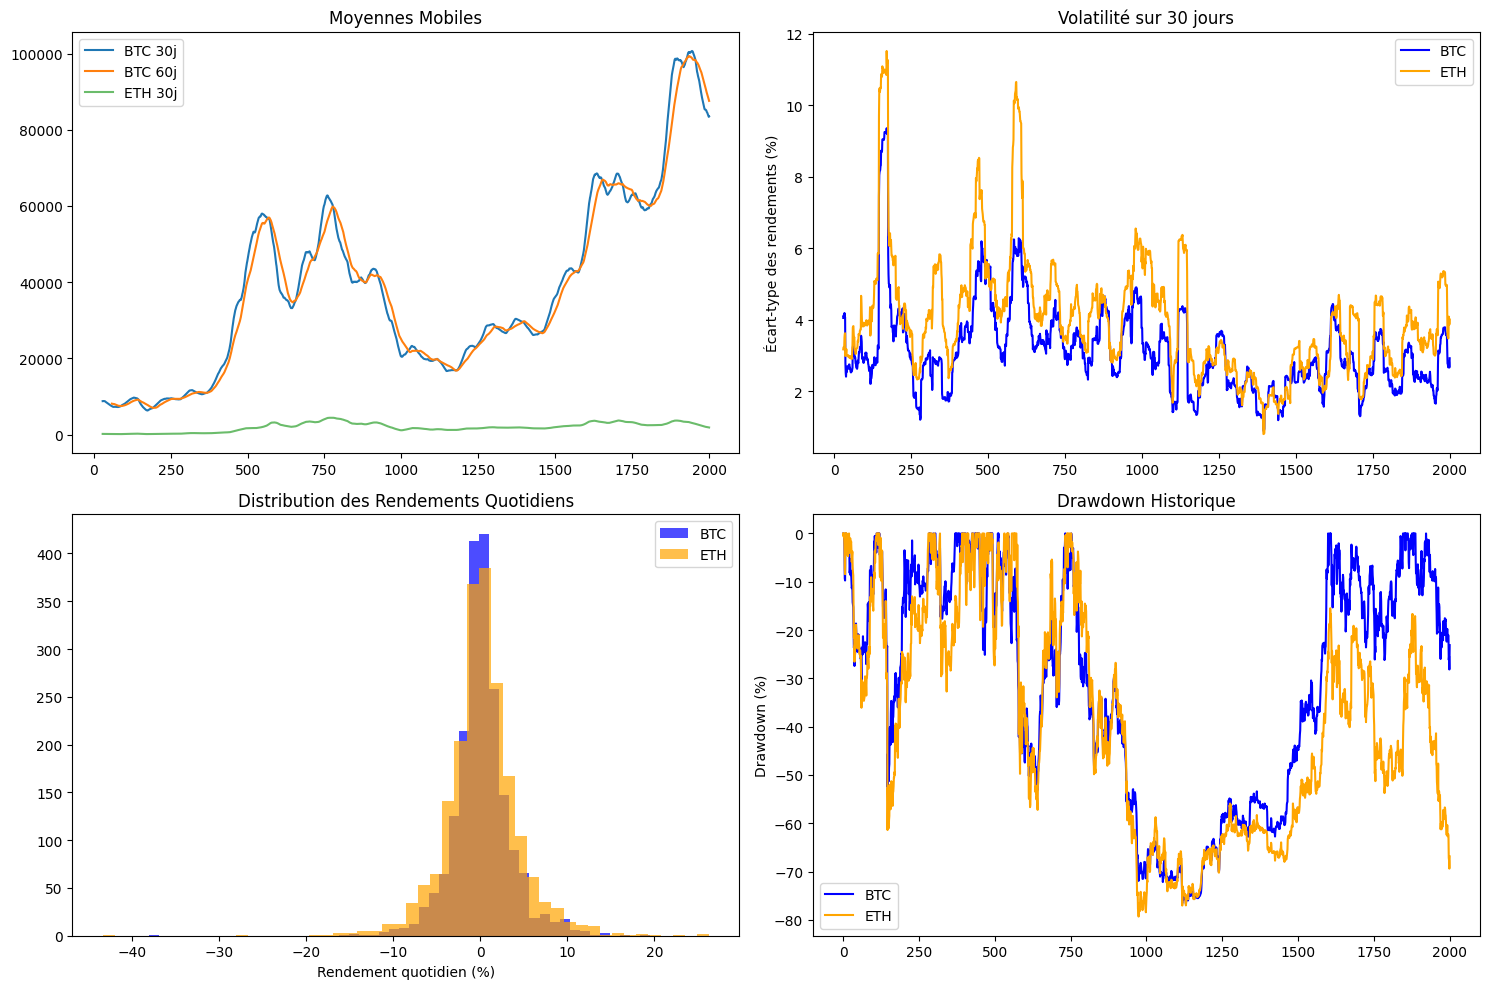

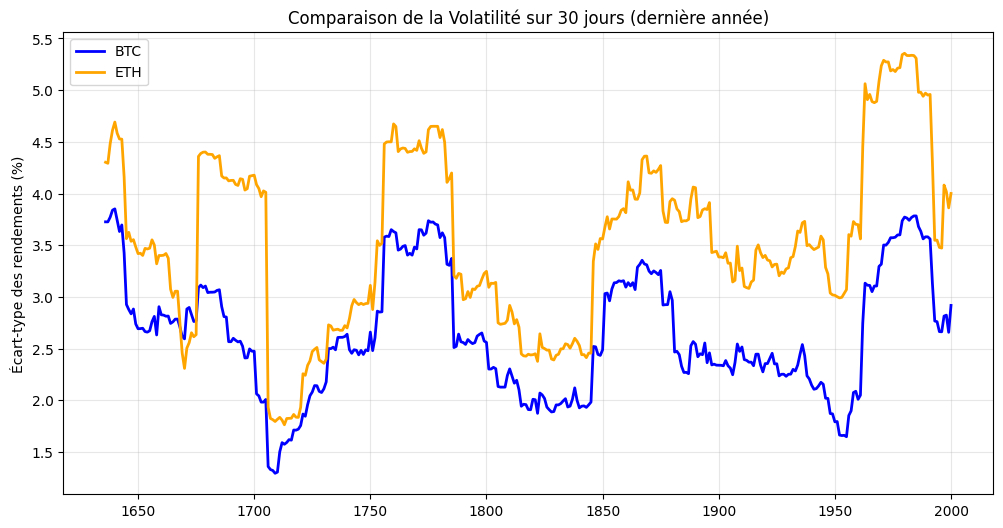

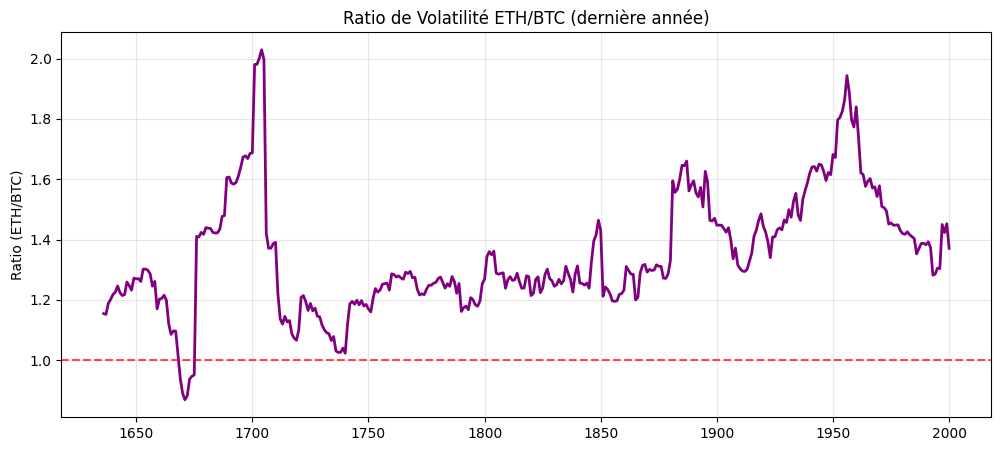


Ratio de volatilit√© moyen ETH/BTC: 1.29
Un ratio > 1 indique que ETH est plus volatil que BTC


In [ ]:
# =================================================================
# ANALYSE STATISTIQUE AVANC√âE
# =================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supposons que bitcoin_data et ethereum_data sont d√©j√† charg√©s
# Si ce n'est pas le cas, ajoutez le code pour charger vos donn√©es ici

def calculate_statistics(df, crypto_name):
    """Calcule les statistiques avanc√©es pour une cryptomonnaie"""
    # Cr√©ation d'une copie pour √©viter les avertissements de modification
    df = df.copy()

    # Calcul des rendements quotidiens
    df['daily_return'] = df['close'].pct_change() * 100

    # Statistiques descriptives
    stats = {
        'Moyenne (USD)': df['close'].mean(),
        'M√©diane (USD)': df['close'].median(),
        '√âcart-type (USD)': df['close'].std(),
        'Volatilit√© (rendement %)': df['daily_return'].std(),
        'Rendement moyen quotidien (%)': df['daily_return'].mean(),
        'Skewness des rendements': df['daily_return'].skew(),
        'Kurtosis des rendements': df['daily_return'].kurtosis(),
        'Corr√©lation BTC/ETH': None  # Rempli plus tard
    }

    # Calculs suppl√©mentaires
    df['rolling_30'] = df['close'].rolling(window=30).mean()
    df['rolling_60'] = df['close'].rolling(window=60).mean()
    df['volatility_30'] = df['daily_return'].rolling(window=30).std()

    # Maximum Drawdown
    df['cumulative_max'] = df['close'].cummax()
    df['drawdown'] = (df['close'] - df['cumulative_max']) / df['cumulative_max'] * 100
    stats['Max Drawdown (%)'] = df['drawdown'].min()

    # Rendement annualis√©
    annualized_return = (1 + df['daily_return'].mean()/100)**365 - 1
    stats['Rendement annualis√© (%)'] = annualized_return * 100

    return stats, df

# Calcul pour les deux cryptomonnaies
btc_stats, bitcoin_data_processed = calculate_statistics(bitcoin_data, 'Bitcoin')
eth_stats, ethereum_data_processed = calculate_statistics(ethereum_data, 'Ethereum')

# Calcul de la corr√©lation
correlation = bitcoin_data_processed['daily_return'].corr(ethereum_data_processed['daily_return'])
btc_stats['Corr√©lation BTC/ETH'] = correlation
eth_stats['Corr√©lation BTC/ETH'] = correlation

# V√©rification de la volatilit√©
print("\nV√©rification de la volatilit√© moyenne sur 30 jours:")
print(f"Volatilit√© BTC: {bitcoin_data_processed['volatility_30'].mean():.2f}")
print(f"Volatilit√© ETH: {ethereum_data_processed['volatility_30'].mean():.2f}")

# Cr√©ation du DataFrame pour l'affichage
stats_df = pd.DataFrame([btc_stats, eth_stats], index=['Bitcoin', 'Ethereum'])
print("\nStatistiques Comparatives:")
print(stats_df.transpose().to_markdown(floatfmt=".2f"))

# =================================================================
# VISUALISATIONS COMPL√âMENTAIRES
# =================================================================

plt.figure(figsize=(15, 10))

# Moyennes mobiles
plt.subplot(2, 2, 1)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['rolling_30'], label='BTC 30j')
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['rolling_60'], label='BTC 60j')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['rolling_30'], label='ETH 30j', alpha=0.7)
plt.title('Moyennes Mobiles')
plt.legend()

# Volatilit√© - CORRECTION ICI
plt.subplot(2, 2, 2)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['volatility_30'], label='BTC', color='blue')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['volatility_30'], label='ETH', color='orange')
plt.title('Volatilit√© sur 30 jours')
plt.legend()
plt.ylabel('√âcart-type des rendements (%)')

# Distribution des rendements
plt.subplot(2, 2, 3)
plt.hist(bitcoin_data_processed['daily_return'].dropna(), bins=50, alpha=0.7, label='BTC', color='blue')
plt.hist(ethereum_data_processed['daily_return'].dropna(), bins=50, alpha=0.7, label='ETH', color='orange')
plt.title('Distribution des Rendements Quotidiens')
plt.legend()
plt.xlabel('Rendement quotidien (%)')

# Drawdown
plt.subplot(2, 2, 4)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['drawdown'], label='BTC', color='blue')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['drawdown'], label='ETH', color='orange')
plt.title('Drawdown Historique')
plt.legend()
plt.ylabel('Drawdown (%)')

plt.tight_layout()
plt.savefig('crypto_analysis.png', dpi=300)
plt.show()

# Ajout d'une visualisation sp√©cifique comparative de la volatilit√©
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data_processed.index[-365:], bitcoin_data_processed['volatility_30'].tail(365), label='BTC', color='blue', linewidth=2)
plt.plot(ethereum_data_processed.index[-365:], ethereum_data_processed['volatility_30'].tail(365), label='ETH', color='orange', linewidth=2)
plt.title('Comparaison de la Volatilit√© sur 30 jours (derni√®re ann√©e)')
plt.legend()
plt.ylabel('√âcart-type des rendements (%)')
plt.grid(True, alpha=0.3)
plt.savefig('volatility_comparison.png', dpi=300)
plt.show()

# Ratio de volatilit√© ETH/BTC (pour montrer combien ETH est plus volatil que BTC)
common_dates = bitcoin_data_processed.index.intersection(ethereum_data_processed.index)
btc_vol = bitcoin_data_processed.loc[common_dates, 'volatility_30']
eth_vol = ethereum_data_processed.loc[common_dates, 'volatility_30']
volatility_ratio = eth_vol / btc_vol

plt.figure(figsize=(12, 5))
plt.plot(common_dates[-365:], volatility_ratio.tail(365), color='purple', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)
plt.title('Ratio de Volatilit√© ETH/BTC (derni√®re ann√©e)')
plt.ylabel('Ratio (ETH/BTC)')
plt.grid(True, alpha=0.3)
plt.savefig('volatility_ratio.png', dpi=300)
plt.show()

print(f"\nRatio de volatilit√© moyen ETH/BTC: {volatility_ratio.mean():.2f}")
print(f"Un ratio > 1 indique que ETH est plus volatil que BTC")

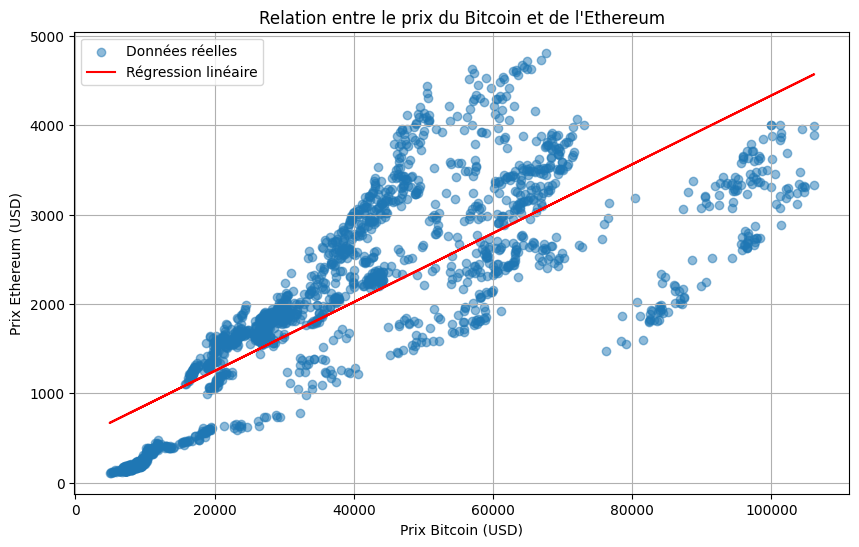

Coefficient de corr√©lation (pente): 0.0385
Intercept: 478.12


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Copier les donn√©es r√©cup√©r√©es et mettre 'time' comme index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les donn√©es sur les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Pr√©paration des donn√©es pour le mod√®le
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

# R√©gression lin√©aire
model = LinearRegression()
model.fit(X, y)
eth_pred = model.predict(X)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.scatter(btc_prices, eth_prices, alpha=0.5, label='Donn√©es r√©elles')
plt.plot(btc_prices, eth_pred, color='red', label='R√©gression lin√©aire')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients
print(f"Coefficient de corr√©lation (pente): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

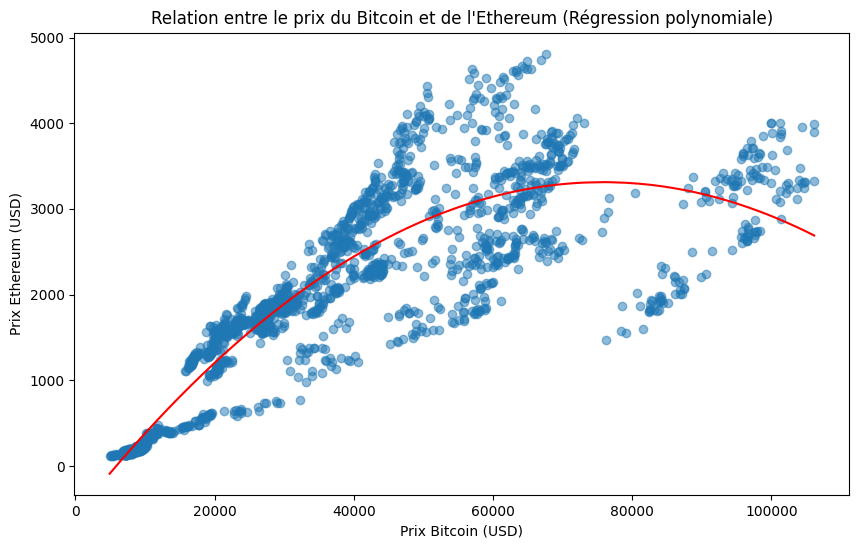

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# S'assurer que les donn√©es ont le bon index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# R√©gression polynomiale (degr√© 2)
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
eth_pred_poly = poly_model.predict(X)

# Tri des donn√©es pour une courbe lisse
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
y_sorted = eth_pred_poly[sorted_indices]

# Affichage
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Donn√©es r√©elles')
plt.plot(X_sorted, y_sorted, color='red', label='R√©gression polynomiale')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum (R√©gression polynomiale)')
plt.legend


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Copier les donn√©es r√©cup√©r√©es et mettre 'time' comme index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les donn√©es sur les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Pr√©paration des donn√©es pour le mod√®le
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

# R√©gression avec MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=1)
model.fit(X, y)

# Pr√©dictions
eth_pred = model.predict(X)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.scatter(btc_prices, eth_prices, alpha=0.5, label='Donn√©es r√©elles')
plt.plot(btc_prices, eth_pred, color='red', label='Pr√©diction MLP')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients
print(f"Coefficients du mod√®le (weights): {model.coefs_}")
print(f"Intercept: {model.intercepts_}")


Coefficients du mod√®le (weights): [array([[-0.0084003 ,  0.1800353 , -0.26961297, -0.07055504, -0.17145101,
        -0.20770352, -0.14533368, -0.04439475, -0.01693144,  0.05379087,
        -0.00761885,  0.10027627, -0.13338353,  0.28677579, -0.25125766,
         0.14424529, -0.00829686,  0.06745106, -0.17567946, -0.13754885,
         0.17946717,  0.29438477, -0.06369627,  0.10525307,  0.2854261 ,
         0.29919753, -0.21258164, -0.24341621, -0.15617081,  0.23277524,
        -0.20368844, -0.00695652,  0.34217743, -0.00603705,  0.15889055,
        -0.06241247,  0.15519739,  0.20334435, -0.25737788,  0.19891362,
         0.36349517,  0.14345579, -0.08429962,  0.17164977, -0.2004299 ,
        -0.00078656,  0.2535869 , -0.07599953, -0.0796688 , -0.18256555]]), array([[-0.05563873],
       [ 0.04589703],
       [ 0.19320273],
       [-0.03765308],
       [ 0.20828763],
       [ 0.02701017],
       [-0.25903788],
       [ 0.22227699],
       [ 0.06635858],
       [ 0.36966394],
       [-0.

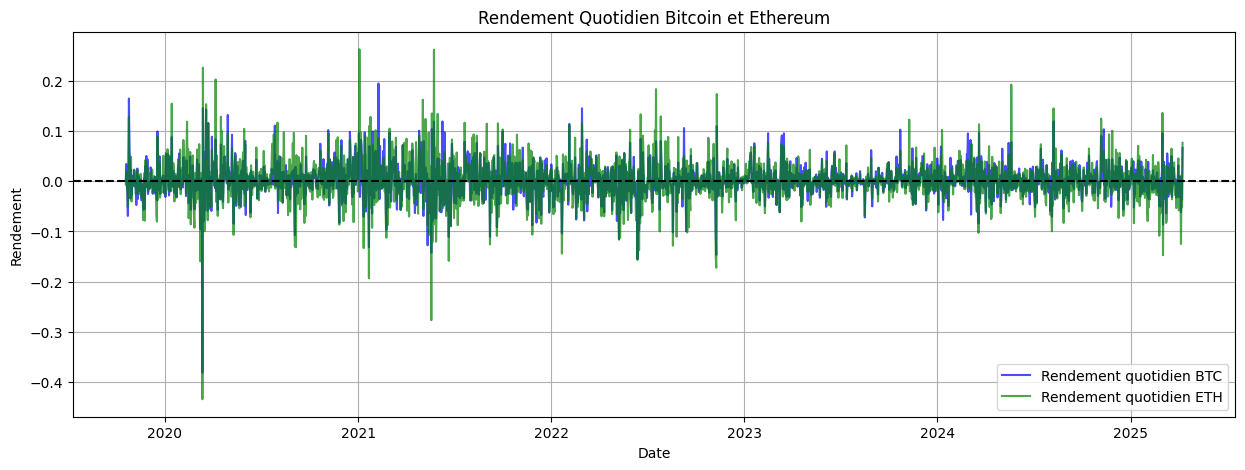

In [ ]:
# Param√®tres : collecte des donn√©es
btc = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Mise en forme
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Calcul du rendement quotidien bas√© sur la colonne 'close'
btc_returns = btc['close'].pct_change().dropna()
eth_returns = eth['close'].pct_change().dropna()

# Aligner les dates communes
common_index = btc_returns.index.intersection(eth_returns.index)
btc_returns = btc_returns.loc[common_index]
eth_returns = eth_returns.loc[common_index]

# Trac√© du rendement quotidien
plt.figure(figsize=(15, 5))
plt.plot(btc_returns, label='Rendement quotidien BTC', color='blue', alpha=0.7)
plt.plot(eth_returns, label='Rendement quotidien ETH', color='green', alpha=0.7)
plt.title('Rendement Quotidien Bitcoin et Ethereum')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Comparaison des statistiques descriptives
descriptive_stats = pd.DataFrame({
    'BTC': [btc_returns.mean(), btc_returns.std()],
    'ETH': [eth_returns.mean(), eth_returns.std()]
}, index=['Moyenne', '√âcart-type'])
print("\n=== Statistiques descriptives des rendements ===")
print(descriptive_stats)


=== Statistiques descriptives des rendements ===
                 BTC       ETH
Moyenne     0.001740  0.002079
√âcart-type  0.033717  0.043685


In [ ]:
# Calcul de la corr√©lation entre les prix de cl√¥ture de Bitcoin et Ethereum : Corr√©lation de Pearson :
correlation = bitcoin_data['close'].corr(ethereum_data['close'])
print(f"Corr√©lation entre Bitcoin et Ethereum : {correlation}")


Corr√©lation entre Bitcoin et Ethereum : 0.8040819423148409


In [ ]:
# Collecte des donn√©es
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fusion des donn√©es sur la colonne 'time'
merged_data = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

# Calcul de la corr√©lation glissante (fen√™tre de 30 jours)
# Calcul de la corr√©lation glissante (fen√™tre de 30 jours)
window = 30
merged_data['rolling_corr'] = merged_data['close_btc'].rolling(window).corr(merged_data['close_eth'])

# Calcul de la moyenne de la corr√©lation
mean_correlation = merged_data['rolling_corr'].mean()

# Trac√© de la corr√©lation dynamique + moyenne
plt.figure(figsize=(12, 6))
plt.plot(merged_data['time'], merged_data['rolling_corr'], label=f'Corr√©lation glissante ({window} jours)', color='purple', alpha=0.7)
plt.axhline(y=mean_correlation, color='red', linestyle='-', label=f'Moyenne (={mean_correlation:.2f})', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Coefficient de Corr√©lation')
plt.title('Corr√©lation Dynamique entre Bitcoin et Ethereum')
plt.legend()
plt.grid(True)
plt.show()

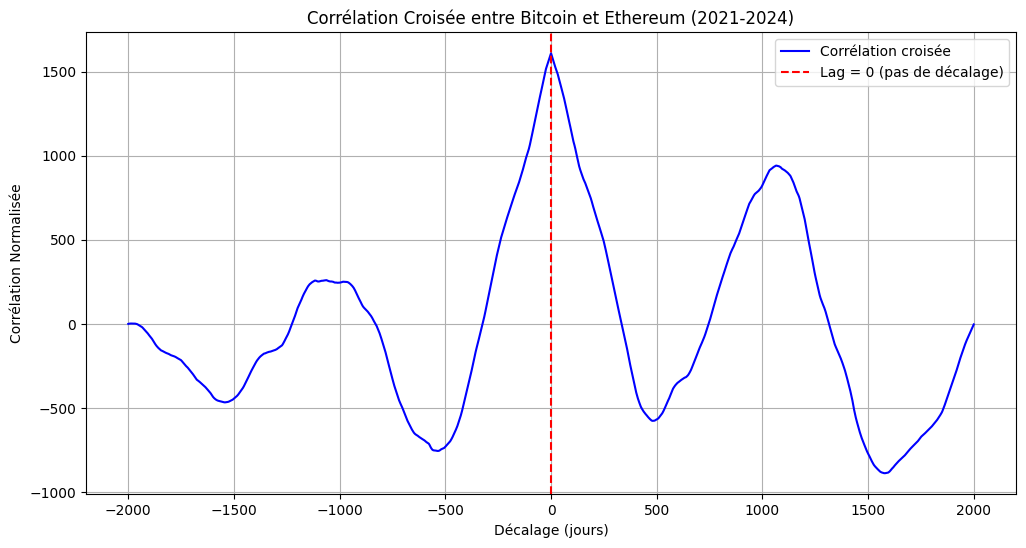

Corr√©lation maximale: 1608.99 √† un d√©calage de 0 jours.


In [ ]:

# T√©l√©chargement des donn√©es
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 2. Nettoyage et alignement des s√©ries temporelles
btc_prices = btc_data['close'].values
eth_prices = eth_data['close'].values

# Normalisation (pour une corr√©lation comparable)
btc_normalized = (btc_prices - np.mean(btc_prices)) / np.std(btc_prices)
eth_normalized = (eth_prices - np.mean(eth_prices)) / np.std(eth_prices)

# 3. Calcul de la corr√©lation crois√©e
cross_corr = np.correlate(btc_normalized, eth_normalized, mode='full')
lags = np.arange(-len(btc_prices) + 1, len(btc_prices))  # D√©calages en jours

# 4. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, label='Corr√©lation crois√©e', color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Lag = 0 (pas de d√©calage)')
plt.xlabel('D√©calage (jours)')
plt.ylabel('Corr√©lation Normalis√©e')
plt.title('Corr√©lation Crois√©e entre Bitcoin et Ethereum (2021-2024)')
plt.grid(True)
plt.legend()
plt.show()

# 5. Analyse des pics
max_corr = np.max(cross_corr)
best_lag = lags[np.argmax(cross_corr)]
print(f"Corr√©lation maximale: {max_corr:.2f} √† un d√©calage de {best_lag} jours.")

# Analyse du Diagramme de Corr√©lation Crois√©e (BTC/ETH - 2021-2024)

## 1. Description du Graphique
Le graphique montre la **corr√©lation crois√©e normalis√©e** entre les prix de Bitcoin (BTC) et Ethereum (ETH) pour des d√©calages temporels (*lags*) allant de **-2000 √† +2000 jours** (environ 5.5 ans).  

- **Axe X (*Lag*)** :  
  - `Lag = 0` : Corr√©lation instantan√©e (pas de d√©calage).  
  - `Lag > 0` : BTC pr√©c√®de ETH.  
  - `Lag < 0` : ETH pr√©c√®de BTC.  
- **Axe Y** : Coefficient de corr√©lation normalis√© (de -1 √† 1).  

---

## 2. Observations Cl√©s
### **Pic central √† Lag = 0**  
- La corr√©lation est **maximale** (proche de 1), indiquant que BTC et ETH √©voluent de mani√®re synchrone sans d√©lai.  
- *Interpr√©tation* : Les deux cryptos r√©agissent simultan√©ment aux m√™mes √©v√©nements de march√© (ex: tendances macro√©conomiques).  

### **Sym√©trie globale**  
- Le graphique est approximativement sym√©trique autour de `Lag = 0`, sugg√©rant qu'**aucune crypto ne domine syst√©matiquement l'autre** sur le long terme.  

### **Absence de pics secondaires**  
- Aucun pic significatif n'appara√Æt pour `Lag ‚â† 0`, ce qui signifie qu'il n'y a pas de **d√©pendance temporelle d√©cal√©e** (ex: BTC n'influence pas ETH avec un d√©lai fixe).  

---

## 3. Implications pour le Trading
- **Diversification limit√©e** : La forte corr√©lation instantan√©e r√©duit l'int√©r√™t de d√©tenir BTC et ETH pour diversifier un portefeuille.  
- **Strat√©gies court-termistes** : Privil√©giez des indicateurs haute fr√©quence (ex: donn√©es on-chain) plut√¥t que des d√©calages temporels pour anticiper les mouvements.  

---

## 4. Limitations
- **P√©riode analys√©e** : Les donn√©es couvrent 2021‚Äì2024, une p√©riode de march√© haussier puis baissier. Des analyses par sous-p√©riodes (ex: bull/bear markets) pourraient r√©v√©ler des dynamiques diff√©rentes.  
- **Normalisation** : La corr√©lation est calcul√©e sur des prix normalis√©s, masquant les amplitudes r√©elles des variations.  

---

### **R√©sum√©**  
*"BTC et ETH sont fortement corr√©l√©s sans d√©lai, ce qui sugg√®re des r√©actions synchrones aux chocs de march√©, mais aucun lead-lag significatif."*  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR

# 1. Fonction de collecte des donn√©es CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,
        'tsym': 'USD',
        'limit': 2000,
        'toTs': end_timestamp,
        'extraParams': 'crypto_prediction'
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        df.set_index('time', inplace=True)
        return df
    else:
        print(f"Erreur lors de la r√©cup√©ration des donn√©es: {response.status_code}")
        return None

# 2. D√©finir les timestamps de d√©but et de fin
start_timestamp = 1614556800  # Exemple : 1er mars 2021
end_timestamp = int(time.time())

# 3. T√©l√©chargement des donn√©es
btc_df = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_df = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 4. Nettoyage et pr√©paration
btc = btc_df['close']
eth = eth_df['close']
data = pd.concat([btc, eth], axis=1)
data.columns = ['Bitcoin', 'Ethereum']
data = data.dropna()

# 5. Diff√©renciation pour stationnarit√©
data_diff = data.diff().dropna()

# 6. Test de Granger
print("=== Test de causalit√© de Granger (BTC -> ETH) ===")
granger_btc_eth = grangercausalitytests(data_diff[['Ethereum', 'Bitcoin']], maxlag=5, verbose=True)

print("\n=== Test de causalit√© de Granger (ETH -> BTC) ===")
granger_eth_btc = grangercausalitytests(data_diff[['Bitcoin', 'Ethereum']], maxlag=5, verbose=True)

# 7. Extraction des p-values
def extract_pvalues(results, maxlag):
    return [results[i+1][0]['ssr_ftest'][1] for i in range(maxlag)]

pvals_btc_eth = extract_pvalues(granger_btc_eth, 5)
pvals_eth_btc = extract_pvalues(granger_eth_btc, 5)

# 8. Visualisation des p-values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), pvals_btc_eth, marker='o', label='BTC cause ETH')
plt.plot(range(1, 6), pvals_eth_btc, marker='s', label='ETH cause BTC')
plt.axhline(y=0.05, color='red', linestyle='--', label='Seuil de significativit√© (5%)')
plt.title('Test de Causalit√© de Granger entre Bitcoin et Ethereum')
plt.xlabel('Nombre de lags')
plt.ylabel('p-value')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

# 9. Mod√®le VAR
model = VAR


=== Test de causalit√© de Granger (BTC -> ETH) ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9775  , p=0.3229  , df_denom=1996, df_num=1
ssr based chi2 test:   chi2=0.9789  , p=0.3225  , df=1
likelihood ratio test: chi2=0.9787  , p=0.3225  , df=1
parameter F test:         F=0.9775  , p=0.3229  , df_denom=1996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0321  , p=0.3565  , df_denom=1993, df_num=2
ssr based chi2 test:   chi2=2.0693  , p=0.3553  , df=2
likelihood ratio test: chi2=2.0683  , p=0.3555  , df=2
parameter F test:         F=1.0321  , p=0.3565  , df_denom=1993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6482  , p=0.1763  , df_denom=1990, df_num=3
ssr based chi2 test:   chi2=4.9620  , p=0.1746  , df=3
likelihood ratio test: chi2=4.9558  , p=0.1751  , df=3
parameter F test:         F=1.6482  , p=0.1763  , df_denom=1990, df_num=3

Granger Causality
number of lags (no

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
# R√©cup√©rer les donn√©es
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# V√©rification
if btc_data is not None and eth_data is not None:
    # Fusionner sur la colonne 'time'
    merged = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Trier par date
    merged.sort_values('time', inplace=True)

    # Extraire les s√©ries de prix
    btc_prices = merged['close_btc']
    eth_prices = merged['close_eth']

    # Calcul et affichage des corr√©lations avec lags
    print("Corr√©lations avec diff√©rents lags :")
    lags = range(1, 11)
    correlations = []
    for lag in lags:
        shifted_eth = eth_prices.shift(lag)
        corr = btc_prices.corr(shifted_eth)
        correlations.append(corr)
        print(f"Lag {lag} : Corr√©lation = {corr:.4f}")

    # Tracer la courbe
    plt.figure(figsize=(10, 5))
    plt.plot(lags, correlations, marker='o', linestyle='-')
    plt.title("Corr√©lation entre BTC et ETH avec diff√©rents lags")
    plt.xlabel("Lag (jours)")
    plt.ylabel("Corr√©lation")
    plt.grid(True)
    plt.xticks(lags)
    plt.show()
else:
    print("Erreur : Donn√©es BTC ou ETH manquantes.")


KeyError: "['time'] not in index"

Corr√©lations avec diff√©rents lags :
Lag 1 : Corr√©lation = 0.8022
Lag 2 : Corr√©lation = 0.8007
Lag 3 : Corr√©lation = 0.7991
Lag 4 : Corr√©lation = 0.7975
Lag 5 : Corr√©lation = 0.7956
Lag 6 : Corr√©lation = 0.7938
Lag 7 : Corr√©lation = 0.7918
Lag 8 : Corr√©lation = 0.7901
Lag 9 : Corr√©lation = 0.7885
Lag 10 : Corr√©lation = 0.7868


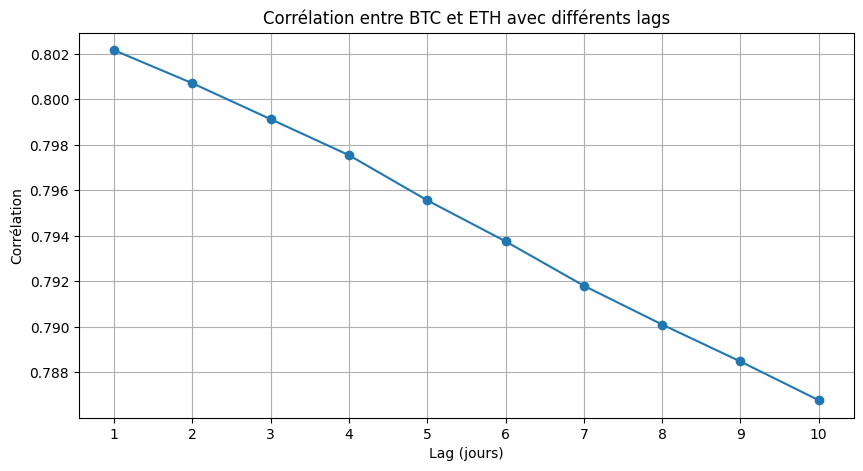

In [ ]:
# R√©cup√©rer les donn√©es
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# V√©rification
if btc_data is not None and eth_data is not None:
    # Reset 'time' to a column if it's the index
    if btc_data.index.name == 'time':
        btc_data = btc_data.reset_index()
    if eth_data.index.name == 'time':
        eth_data = eth_data.reset_index()

    # Fusionner sur la colonne 'time'
    merged = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Trier par date
    merged.sort_values('time', inplace=True)

    # Extraire les s√©ries de prix
    btc_prices = merged['close_btc']
    eth_prices = merged['close_eth']

    # Calcul et affichage des corr√©lations avec lags
    print("Corr√©lations avec diff√©rents lags :")
    lags = range(1, 11)
    correlations = []
    for lag in lags:
        shifted_eth = eth_prices.shift(lag)
        corr = btc_prices.corr(shifted_eth)
        correlations.append(corr)
        print(f"Lag {lag} : Corr√©lation = {corr:.4f}")

    # Tracer la courbe
    plt.figure(figsize=(10, 5))
    plt.plot(lags, correlations, marker='o', linestyle='-')
    plt.title("Corr√©lation entre BTC et ETH avec diff√©rents lags")
    plt.xlabel("Lag (jours)")
    plt.ylabel("Corr√©lation")
    plt.grid(True)
    plt.xticks(lags)
    plt.show()
else:
    print("Erreur : Donn√©es BTC ou ETH manquantes.")

In [ ]:
from statsmodels.tsa.api import VAR

# Pr√©parer les donn√©es pour le mod√®le VAR
data = pd.concat([bitcoin_data['close'], ethereum_data['close']], axis=1)
data.columns = ['Bitcoin', 'Ethereum']

# Cr√©er un mod√®le VAR
model = VAR(data)
model_fitted = model.fit(5)  # Ajuster le mod√®le avec un nombre de lags (ici 5)

# R√©sum√© du mod√®le
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Apr, 2025
Time:                     17:47:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.7134
Nobs:                     1996.00    HQIC:                   22.6744
Log likelihood:          -28248.8    FPE:                6.87876e+09
AIC:                      22.6517    Det(Omega_mle):     6.80357e+09
--------------------------------------------------------------------
Results for equation Bitcoin
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             125.923063        61.468239            2.049           0.041
L1.Bitcoin          1.006339         0.035020           28.736           0.000
L1.Ethereum        -1.349478         0.521385           -2.588    

In [ ]:
bitcoin_data.head()

time     high      low     open  volumefrom      volumeto    close  \
0 2019-10-18  8157.36  7850.66  8082.46    27732.54  2.210659e+08  7972.62   
1 2019-10-19  8108.69  7919.05  7972.62    17875.39  1.432024e+08  7973.63   
2 2019-10-20  8326.13  7911.49  7973.63    25287.68  2.053943e+08  8247.25   
3 2019-10-21  8359.52  8177.11  8247.25    22831.65  1.885115e+08  8223.25   
4 2019-10-22  8318.41  8021.36  8223.25    24453.79  2.005939e+08  8034.50   

  conversionType conversionSymbol  
0         direct                   
1         direct                   
2         direct                   
3         direct                   
4         direct

In [ ]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              2001 non-null   datetime64[ns]
 1   high              2001 non-null   float64       
 2   low               2001 non-null   float64       
 3   open              2001 non-null   float64       
 4   volumefrom        2001 non-null   float64       
 5   volumeto          2001 non-null   float64       
 6   close             2001 non-null   float64       
 7   conversionType    2001 non-null   object        
 8   conversionSymbol  2001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 140.8+ KB


In [ ]:
bitcoin_data.describe()

time           high            low           open  \
count                 2001    2001.000000    2001.000000    2001.000000   
mean   2022-07-14 00:00:00   38849.394168   37067.532594   37984.912404   
min    2019-10-18 00:00:00    5364.930000    3948.920000    4916.780000   
25%    2021-03-01 00:00:00   19488.810000   18733.670000   19181.410000   
50%    2022-07-14 00:00:00   34253.500000   31601.990000   33084.080000   
75%    2023-11-26 00:00:00   57528.160000   53742.580000   55863.730000   
max    2025-04-09 00:00:00  109340.210000  105308.990000  106155.610000   
std                    NaN   24852.294588   23778.034549   24338.581196   

          volumefrom      volumeto          close  
count    2001.000000  2.001000e+03    2001.000000  
mean    40664.601764  1.472232e+09   38021.660145  
min      3495.960000  7.959746e+07    4916.780000  
25%     22783.460000  5.245115e+08   19182.010000  
50%     34442.640000  1.094032e+09   33088.510000  
75%     50094.060000  1.877438e+09   55866.600000  
max    319316.540000  1.204144e+10  106155.610000  
std     28262.105219  1.423213e+09   24348.918024

In [ ]:
ethereum_data.head()

time    high     low    open  volumefrom      volumeto   close  \
0 2019-10-18  175.72  171.73  177.41  1687411.38  2.926047e+08  173.40   
1 2019-10-19  174.94  170.80  173.40  1290858.94  2.224281e+08  172.31   
2 2019-10-20  178.88  175.01  172.31  1429636.02  2.513749e+08  175.83   
3 2019-10-21  176.55  173.02  175.83  1694348.83  2.953807e+08  174.33   
4 2019-10-22  179.33  168.16  174.33  1885090.78  3.230591e+08  171.38   

  conversionType conversionSymbol  
0       multiply              BTC  
1       multiply              BTC  
2       multiply              BTC  
3       multiply              BTC  
4       multiply              BTC

In [ ]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              2001 non-null   datetime64[ns]
 1   high              2001 non-null   float64       
 2   low               2001 non-null   float64       
 3   open              2001 non-null   float64       
 4   volumefrom        2001 non-null   float64       
 5   volumeto          2001 non-null   float64       
 6   close             2001 non-null   float64       
 7   conversionType    2001 non-null   object        
 8   conversionSymbol  2001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 140.8+ KB


In [ ]:
ethereum_data.describe()

time         high          low         open  \
count                 2001  2001.000000  2001.000000  2001.000000   
mean   2022-07-14 00:00:00  1997.239875  1882.580345  1943.004023   
min    2019-10-18 00:00:00   117.550000   105.220000   110.230000   
25%    2021-03-01 00:00:00  1233.380000  1172.990000  1211.070000   
50%    2022-07-14 00:00:00  1907.760000  1833.550000  1871.760000   
75%    2023-11-26 00:00:00  2949.740000  2748.460000  2856.120000   
max    2025-04-09 00:00:00  4865.940000  4710.000000  4810.970000   
std                    NaN  1200.060640  1130.201155  1167.886572   

         volumefrom      volumeto        close  
count  2.001000e+03  2.001000e+03  2001.000000  
mean   7.229782e+05  9.469338e+08  1943.711954  
min    2.981167e+04  3.759109e+07   110.230000  
25%    2.669968e+05  3.472393e+08  1213.840000  
50%    4.333189e+05  7.104750e+08  1871.760000  
75%    7.810362e+05  1.178707e+09  2856.120000  
max    1.098033e+07  9.657969e+09  4810.970000  
std    8.621333e+05  9.218361e+08  1167.244522

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la colonne 'close' de Bitcoin (prix de cl√¥ture)
adf_result = adfuller(bitcoin_data['close'])
print("\nR√©sultats du test de Dickey-Fuller Augment√© (ADF):")
print(f"Statistique du test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print("Valeurs critiques:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("La s√©rie est stationnaire (on rejette H0).")
else:
    print("La s√©rie n'est pas stationnaire (on ne rejette pas H0).")



R√©sultats du test de Dickey-Fuller Augment√© (ADF):
Statistique du test ADF: -1.0377330770901445
Valeur p: 0.7392545393422805
Valeurs critiques:
   1%: -3.433665351698571
   5%: -2.8630045337025267
   10%: -2.567549656849864
La s√©rie n'est pas stationnaire (on ne rejette pas H0).


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la colonne 'close' de Bitcoin (prix de cl√¥ture)
adf_result = adfuller(ethereum_data['close'])
print("\nR√©sultats du test de Dickey-Fuller Augment√© (ADF):")
print(f"Statistique du test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print("Valeurs critiques:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("La s√©rie est stationnaire (on rejette H0).")
else:
    print("La s√©rie n'est pas stationnaire (on ne rejette pas H0).")



R√©sultats du test de Dickey-Fuller Augment√© (ADF):
Statistique du test ADF: -2.010324203412984
Valeur p: 0.2820647235596337
Valeurs critiques:
   1%: -3.4336519592295947
   5%: -2.862998620943585
   10%: -2.567546508593341
La s√©rie n'est pas stationnaire (on ne rejette pas H0).


In [ ]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS sur la colonne 'close' de Bitcoin (prix de cl√¥ture)
kpss_result = kpss(bitcoin_data['close'], regression='c', nlags="auto")

# Affichage des r√©sultats
print("\nR√©sultats du test KPSS:")
print(f"Statistique du test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print("Valeurs critiques:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

# Interpr√©tation du r√©sultat
if kpss_result[1] < 0.05:
    print("La s√©rie est non stationnaire (on rejette H0).")
else:
    print("La s√©rie est stationnaire (on ne rejette pas H0).")



R√©sultats du test KPSS:
Statistique du test KPSS: 3.4209050488283084
Valeur p: 0.01
Valeurs critiques:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
La s√©rie est non stationnaire (on rejette H0).


<ipython-input-30-a95094855ad1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(bitcoin_data['close'], regression='c', nlags="auto")


In [ ]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS sur la colonne 'close' de Bitcoin (prix de cl√¥ture)
kpss_result = kpss(ethereum_data['close'], regression='c', nlags="auto")

# Affichage des r√©sultats
print("\nR√©sultats du test KPSS:")
print(f"Statistique du test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print("Valeurs critiques:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

# Interpr√©tation du r√©sultat
if kpss_result[1] < 0.05:
    print("La s√©rie est non stationnaire (on rejette H0).")
else:
    print("La s√©rie est stationnaire (on ne rejette pas H0).")



R√©sultats du test KPSS:
Statistique du test KPSS: 2.663530263792811
Valeur p: 0.01
Valeurs critiques:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
La s√©rie est non stationnaire (on rejette H0).


<ipython-input-31-297297ff2db3>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ethereum_data['close'], regression='c', nlags="auto")


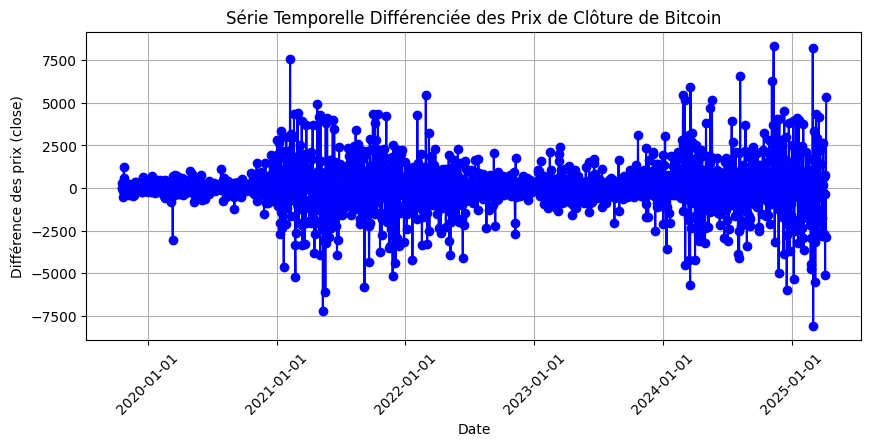

In [ ]:
# Calcul de la diff√©rence premi√®re des prix de cl√¥ture de Bitcoin
diff_res = bitcoin_data['close'].diff().dropna()

# Utiliser l'index des dates correctement pour diff_res
diff_res.index = bitcoin_data['time'].iloc[1:]  # On prend les dates √† partir du 2√®me point

# Affichage des r√©sultats
plt.figure(figsize=(10, 4))
plt.plot(diff_res, marker='o', linestyle='-', color='b')
plt.title('S√©rie Temporelle Diff√©renci√©e des Prix de Cl√¥ture de Bitcoin')
plt.xlabel('Date')
plt.ylabel('Diff√©rence des prix (close)')
plt.grid(True)

# Formater l'axe des X pour afficher les dates au format ann√©e-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotation des dates pour une meilleure lisibilit√©
plt.xticks(rotation=45)

plt.show()


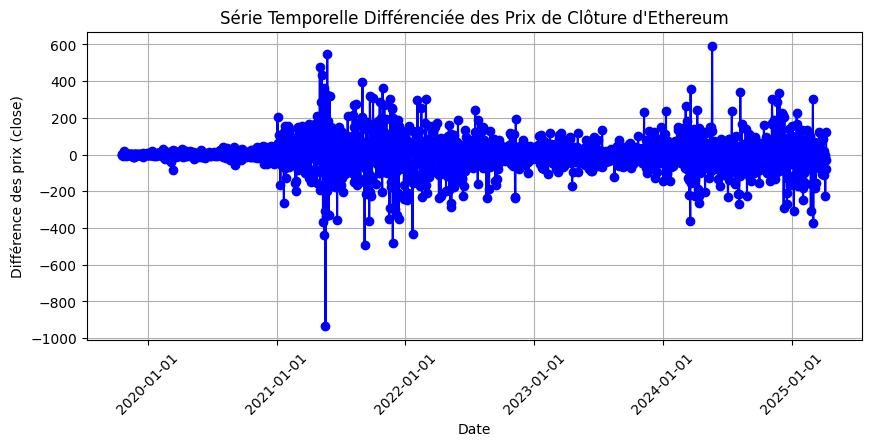

In [ ]:
# Calcul de la diff√©rence premi√®re des prix de cl√¥ture d'Ethereum
diff_res = ethereum_data['close'].diff().dropna()

# Utiliser l'index des dates correctement pour diff_res
diff_res.index = ethereum_data['time'].iloc[1:]  # On prend les dates √† partir du 2√®me point

# Affichage des r√©sultats
plt.figure(figsize=(10, 4))
plt.plot(diff_res, marker='o', linestyle='-', color='b')
plt.title('S√©rie Temporelle Diff√©renci√©e des Prix de Cl√¥ture d\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Diff√©rence des prix (close)')
plt.grid(True)

# Formater l'axe des X pour afficher les dates au format ann√©e-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotation des dates pour une meilleure lisibilit√©
plt.xticks(rotation=45)

plt.show()



Autocorr√©lation (ACF) des prix de cl√¥ture de Bitcoin:
[1.         0.99719436 0.99478231 0.99224711 0.9897376  0.98694891
 0.98413199 0.98140915 0.97878511 0.97622361 0.97350707 0.97071111
 0.96787543 0.96509352 0.96197518 0.95888929 0.95586029 0.95292226
 0.94993056 0.94708587 0.94437953 0.94165805 0.93882025 0.93611205
 0.93340379 0.930519   0.92748063 0.92439716 0.92131392 0.91802535
 0.91492217 0.91185362 0.90852057 0.90505361 0.90141414 0.89769534
 0.89387365 0.89022781 0.88662578 0.88285998 0.87944452 0.87585566
 0.87235856 0.86906319 0.86552993 0.861679   0.8578035  0.85398704
 0.85024385 0.84633113 0.84250554 0.83866718 0.83503378 0.83141969
 0.82775353 0.82398815 0.82017133 0.81619743 0.81216171 0.80798326
 0.80376907 0.79969504 0.79548465 0.79140892 0.78740136 0.78336743
 0.77909181 0.77494793 0.77057807 0.7660241  0.76146    0.75680695
 0.7522266  0.74771881 0.7433842  0.73904999 0.73469145 0.73045842
 0.72628352 0.72193848 0.71774156 0.71338678 0.70887737 0.70447392
 0.70

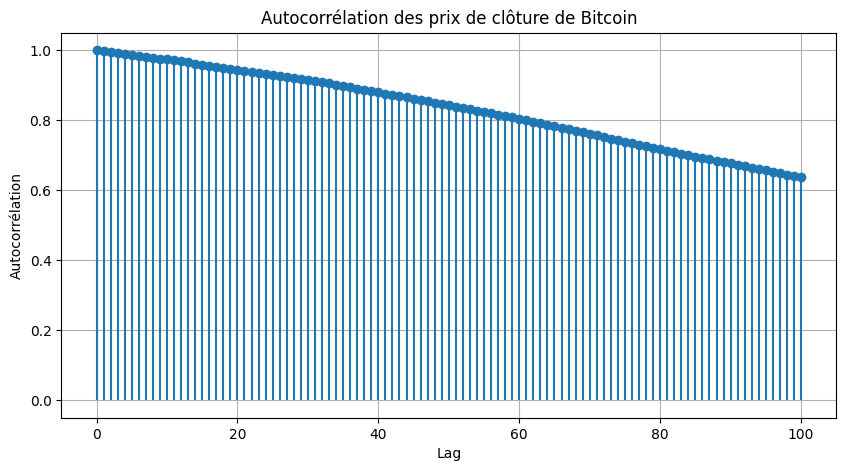

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculer l'autocorr√©lation de la s√©rie de prix de cl√¥ture de Bitcoin
pp_result = sm.tsa.acf(bitcoin_data['close'], nlags=100)  # Calculer l'autocorr√©lation pour 40 lags

# Affichage des r√©sultats
print("\nAutocorr√©lation (ACF) des prix de cl√¥ture de Bitcoin:")
print(pp_result)

# Affichage graphique de l'autocorr√©lation
plt.figure(figsize=(10, 5))
plt.stem(range(len(pp_result)), pp_result, basefmt=" ")  # On retire l'argument use_line_collection
plt.xlabel('Lag')
plt.ylabel('Autocorr√©lation')
plt.title('Autocorr√©lation des prix de cl√¥ture de Bitcoin')
plt.grid(True)
plt.show()


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculer l'autocorr√©lation de la s√©rie de prix de cl√¥ture de Bitcoin
pp_result = sm.tsa.acf(ethereum_data['close'], nlags=100)  # Calculer l'autocorr√©lation pour 40 lags

# Affichage des r√©sultats
print("\nAutocorr√©lation (ACF) des prix de cl√¥ture de Ethereum:")
print(pp_result)

# Affichage graphique de l'autocorr√©lation
plt.figure(figsize=(10, 5))
plt.stem(range(len(pp_result)), pp_result, basefmt=" ")  # On retire l'argument use_line_collection
plt.xlabel('Lag')
plt.ylabel('Autocorr√©lation')
plt.title('Autocorr√©lation des prix de cl√¥ture de Ethereum')
plt.grid(True)
plt.show()



Autocorr√©lation (ACF) des prix de cl√¥ture de Ethereum:
[1.         0.9962282  0.99291465 0.98947673 0.98585441 0.98214497
 0.97877164 0.97495831 0.97128097 0.96786245 0.96433313 0.9606683
 0.95695627 0.95355665 0.94990865 0.94643085 0.94306277 0.94003981
 0.93668344 0.93355271 0.93052508 0.92752825 0.92441461 0.92130382
 0.91813112 0.91487466 0.91145711 0.90803179 0.90431274 0.90021074
 0.896273   0.8920063  0.88751577 0.88333775 0.87882238 0.87435901
 0.86975754 0.86523073 0.86078473 0.8567782  0.8529756  0.84900692
 0.84520098 0.84136414 0.83753932 0.83379649 0.83042306 0.82717541
 0.82395316 0.82066804 0.81755581 0.81440319 0.81156973 0.80875662
 0.80579058 0.80275842 0.79960194 0.7961669  0.79268971 0.78902
 0.78526795 0.78168425 0.77806899 0.77432929 0.77090295 0.76755621
 0.76440308 0.7612625  0.75809994 0.75467397 0.75142434 0.74814232
 0.745152   0.7424113  0.73994926 0.73760064 0.73518153 0.73290688
 0.73069953 0.72868207 0.7266317  0.72425479 0.72173506 0.71942614
 0.71710


PACF des prix de cl√¥ture de Bitcoin:
[ 1.00000000e+00  9.97692959e-01  8.38296933e-02 -2.10785929e-02
  1.65288021e-04 -6.15591086e-02 -1.81982474e-02  1.98361887e-02
  2.41022969e-02  1.89813224e-02 -3.26434430e-02 -2.81744230e-02
 -1.62055718e-02  7.36317749e-03 -6.89290212e-02 -2.46275170e-03
  1.57336637e-02  1.78889861e-02 -5.18924419e-03  2.98984214e-02
  3.13471356e-02 -5.68085121e-03 -3.11407599e-02  2.47667080e-02
  3.88420190e-03 -4.02985601e-02 -4.03604065e-02 -1.22664591e-02
 -5.10966120e-03 -4.90235416e-02  3.32887466e-02  1.98620734e-02
 -6.82823816e-02 -4.80573458e-02 -4.66623828e-02 -1.98702663e-02
 -2.16275358e-02  4.23478666e-02  3.32811943e-02 -3.26783880e-02
  6.33334135e-02 -3.56985192e-02  1.52954818e-02  5.07502540e-02
 -6.23470701e-02 -7.59253663e-02 -1.09213102e-02  5.56832549e-03
  2.03167706e-02 -2.38629482e-02  9.83950456e-03 -2.20681227e-02
  3.42976123e-02  8.82188630e-03 -8.24484065e-03 -2.58288045e-02
 -2.48515681e-02 -3.22293700e-02 -1.35347304e-03 -1

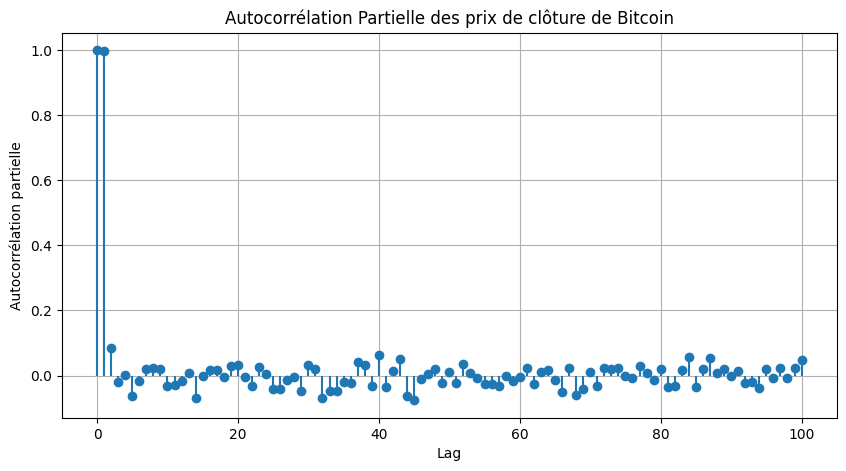

In [ ]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# Calcul de la fonction d'autocorr√©lation partielle (PACF) pour 40 lags
pacf_result = pacf(bitcoin_data['close'], nlags=100)

# Affichage des r√©sultats
print("\nPACF des prix de cl√¥ture de Bitcoin:")
print(pacf_result)

# Affichage graphique de la PACF
plt.figure(figsize=(10, 5))
plt.stem(range(len(pacf_result)), pacf_result, basefmt=" ")
plt.xlabel('Lag')
plt.ylabel('Autocorr√©lation partielle')
plt.title('Autocorr√©lation Partielle des prix de cl√¥ture de Bitcoin')
plt.grid(True)
plt.show()



PACF des prix de cl√¥ture de Euthereum:
[ 1.00000000e+00  9.96726310e-01  6.80347751e-02 -1.61360405e-02
 -3.27035153e-02 -1.93437373e-02  4.86751723e-02 -6.14985068e-02
  9.23191836e-03  3.98102852e-02 -1.19551004e-02 -2.34680638e-02
 -2.07846928e-02  5.12662484e-02 -3.03463957e-02  1.29488771e-02
  1.79458839e-02  5.73400640e-02 -4.40970062e-02  1.18217320e-02
  2.41495032e-02  8.92627313e-03 -2.14829639e-02 -1.60206873e-02
  2.10051274e-04 -1.19864889e-02 -3.98590743e-02 -4.27668021e-03
 -4.15911886e-02 -6.35162847e-02  6.46202791e-03 -4.10533129e-02
 -3.65211665e-02  4.00943410e-02 -5.41167552e-02  1.55428191e-02
 -3.48812907e-02  5.59723679e-03  2.11142869e-02  6.16698286e-02
  4.12349732e-02 -3.32404364e-02  1.83422499e-02 -1.33502592e-02
 -6.22229930e-03  9.16315093e-03  5.24233076e-02  3.28037693e-02
 -8.33775808e-03 -1.29013124e-02  1.39837200e-02  8.79861817e-03
  4.28962995e-02  1.45303271e-02 -1.22407249e-02 -9.04384958e-03
 -2.52598028e-02 -4.29957694e-02 -3.05548286e-03 

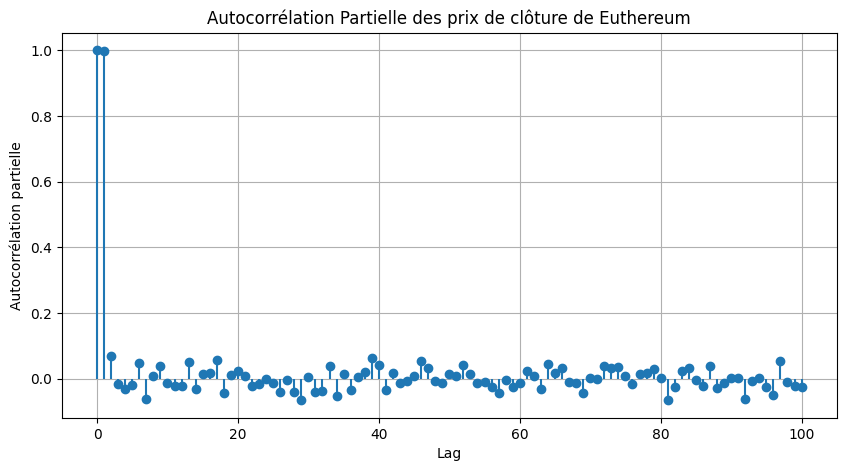

In [ ]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# Calcul de la fonction d'autocorr√©lation partielle (PACF) pour 40 lags
pacf_result = pacf(ethereum_data['close'], nlags=100)

# Affichage des r√©sultats
print("\nPACF des prix de cl√¥ture de Euthereum:")
print(pacf_result)

# Affichage graphique de la PACF
plt.figure(figsize=(10, 5))
plt.stem(range(len(pacf_result)), pacf_result, basefmt=" ")
plt.xlabel('Lag')
plt.ylabel('Autocorr√©lation partielle')
plt.title('Autocorr√©lation Partielle des prix de cl√¥ture de Euthereum')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# D√©finition du mod√®le ARIMA avec les param√®tres (0,1,0)
model = ARIMA(bitcoin_data['close'], order=(0, 1, 0))

# Ajuster le mod√®le sur les donn√©es
model_fit = model.fit()

# Afficher le r√©sum√© du mod√®le ajust√©
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2001
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -17308.443
Date:                Wed, 09 Apr 2025   AIC                          34618.887
Time:                        17:49:12   BIC                          34624.488
Sample:                             0   HQIC                         34620.943
                               - 2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.924e+06   3.11e+04     61.780      0.000    1.86e+06    1.99e+06
Ljung-Box (L1) (Q):                   7.52   Jarque-Bera (JB):              2637.95
Prob(Q):                              0.01   Pr

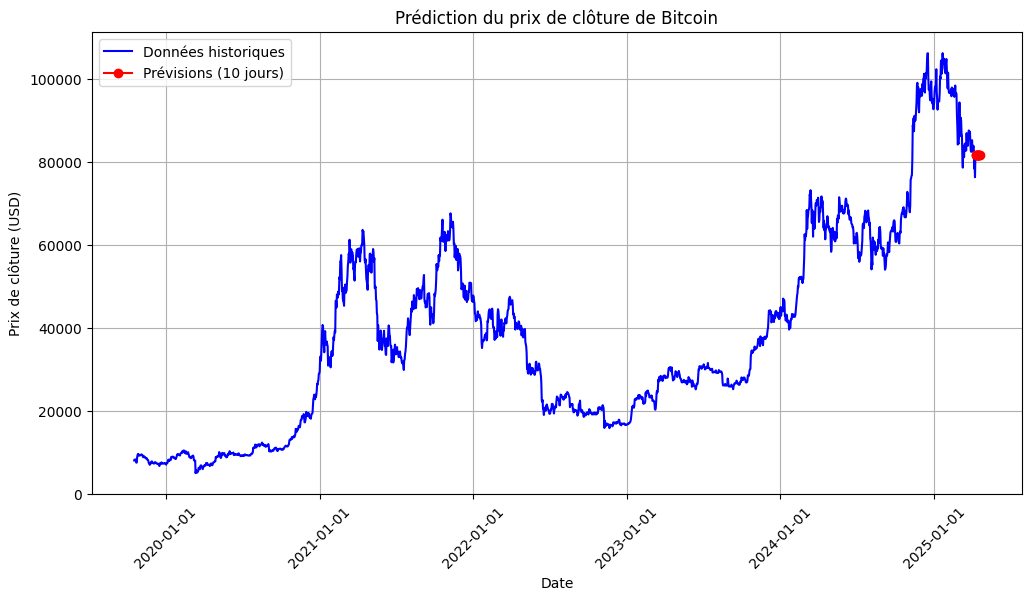

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Faire une pr√©diction pour les 10 prochaines √©tapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# G√©n√©rer une plage de dates pour les pr√©visions (en supposant que tes donn√©es sont journali√®res)
forecast_index = pd.date_range(start=bitcoin_data['time'].iloc[-1], periods=11, freq='D')[1:]

# Tracer la s√©rie historique des prix de cl√¥ture de Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['time'], bitcoin_data['close'], label='Donn√©es historiques', color='blue')

# Tracer les pr√©visions en les ajoutant √† la fin des donn√©es historiques
plt.plot(forecast_index, forecast, label='Pr√©visions (10 jours)', color='red', marker='o')

# Ajouter des labels et une l√©gende
plt.title('Pr√©diction du prix de cl√¥ture de Bitcoin')  # Modifier le titre pour Bitcoin
plt.xlabel('Date')
plt.ylabel('Prix de cl√¥ture (USD)')
plt.legend()

# Formater l'axe des X pour afficher les dates au format ann√©e-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ajouter une grille et afficher le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilit√©
plt.show()


In [ ]:
import numpy as np

# Calcul des r√©sidus (erreurs) du mod√®le ajust√©
residuals = model_fit.resid

# Erreur Absolue Moyenne (MAE)
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE): ", mae)

# Erreur Quadratique Moyenne Racine (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (RMSE): ", rmse)

# Erreur Absolue en Pourcentage Moyenne (MAPE)
# On utilise les donn√©es r√©elles pour calculer le MAPE (il faut que tu aies les valeurs r√©elles de tes pr√©visions).
# Supposons que 'bitcoin_data['close']' contient les valeurs r√©elles de la s√©rie.
# Attention : Le calcul du MAPE ne doit pas inclure des z√©ros pour √©viter la division par z√©ro.

mape = np.mean(np.abs(residuals) / bitcoin_data['close'][1:]) * 100  # Assure-toi d'utiliser les bonnes valeurs r√©elles
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Error (MAE):  857.326111944028
Root Mean Squared Error (RMSE):  1398.5896183332318
Mean Absolute Percentage Error (MAPE):  2.274823841979597


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# D√©finition du mod√®le ARIMA avec les param√®tres (0,1,0)
model = ARIMA(ethereum_data['close'], order=(0, 1, 0))

# Ajuster le mod√®le sur les donn√©es
model_fit = model.fit()

# Afficher le r√©sum√© du mod√®le ajust√©
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2001
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11903.158
Date:                Wed, 09 Apr 2025   AIC                          23808.317
Time:                        17:49:25   BIC                          23813.918
Sample:                             0   HQIC                         23810.373
                               - 2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8645.3884    111.085     77.827      0.000    8427.665    8863.111
Ljung-Box (L1) (Q):                  11.21   Jarque-Bera (JB):              8606.33
Prob(Q):                              0.00   Pr

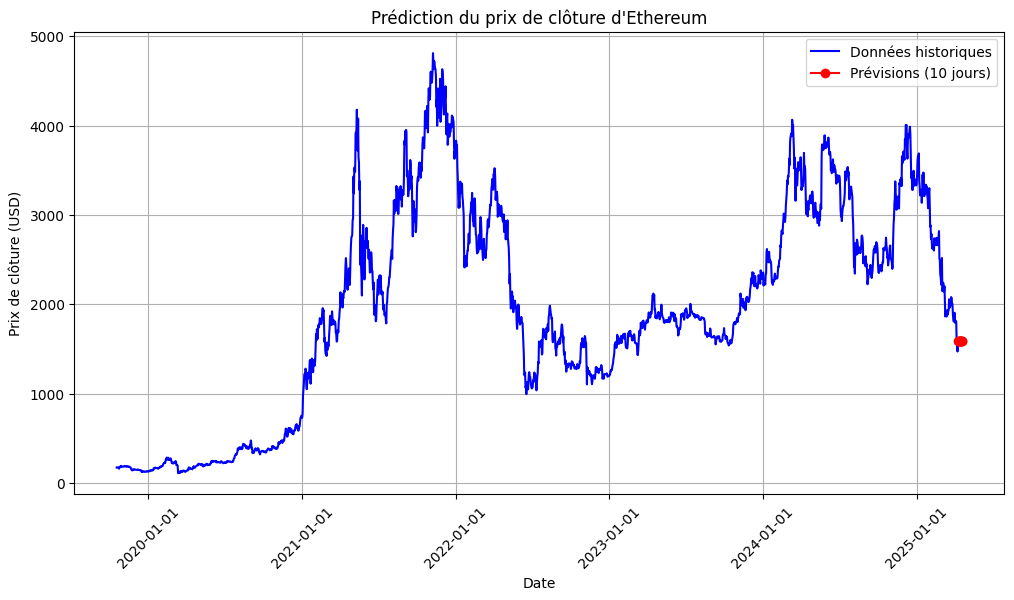

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Faire une pr√©diction pour les 10 prochaines √©tapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# G√©n√©rer une plage de dates pour les pr√©visions (en supposant que tes donn√©es sont journali√®res)
forecast_index = pd.date_range(start=ethereum_data['time'].iloc[-1], periods=11, freq='D')[1:]

# Tracer la s√©rie historique des prix de cl√¥ture d'Ethereum
plt.figure(figsize=(12, 6))
plt.plot(ethereum_data['time'], ethereum_data['close'], label='Donn√©es historiques', color='blue')

# Tracer les pr√©visions en les ajoutant √† la fin des donn√©es historiques
plt.plot(forecast_index, forecast, label='Pr√©visions (10 jours)', color='red', marker='o')

# Ajouter des labels et une l√©gende
plt.title('Pr√©diction du prix de cl√¥ture d\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Prix de cl√¥ture (USD)')
plt.legend()

# Formater l'axe des X pour afficher les ann√©es (ou mois si tu pr√©f√®res)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ajouter une grille et afficher le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilit√©
plt.show()


In [ ]:
import numpy as np

# Calcul des r√©sidus (erreurs) du mod√®le ajust√©
residuals = model_fit.resid

# Erreur Absolue Moyenne (MAE)
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE): ", mae)

# Erreur Quadratique Moyenne Racine (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (RMSE): ", rmse)

# Erreur Absolue en Pourcentage Moyenne (MAPE)
# On utilise les donn√©es r√©elles pour calculer le MAPE (il faut que tu aies les valeurs r√©elles de tes pr√©visions).
# Supposons que 'bitcoin_data['close']' contient les valeurs r√©elles de la s√©rie.
# Attention : Le calcul du MAPE ne doit pas inclure des z√©ros pour √©viter la division par z√©ro.

mape = np.mean(np.abs(residuals) / bitcoin_data['close'][1:]) * 100  # Assure-toi d'utiliser les bonnes valeurs r√©elles
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Error (MAE):  56.857111444277855
Root Mean Squared Error (RMSE):  93.06134882150464
Mean Absolute Percentage Error (MAPE):  0.1492551188408501


In [ ]:
!pip install tensorflow

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.5/24.5 MB 74.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.5/5.5 MB 91.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.1/5.1 MB 97.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.6/6.6 MB 90.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 33ms/step - loss: 0.0268 - mae: 0.1162 - val_loss: 0.0021 - val_mae: 0.0362
Epoch 2/100
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0016 - mae: 0.0279 - val_loss: 0.0040 - val_mae: 0.0509
Epoch 3/100
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0015 - mae: 0.0263 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 4/100
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0015 - mae: 0.0261 - val_loss: 0.0031 - val_mae: 0.0442
Epoch 5/100
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0010 - mae: 0.0222 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 6/100
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0010 - mae: 0.0221 - val_loss: 0.0041 - val_mae: 0.0528
Epoch 7/100
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

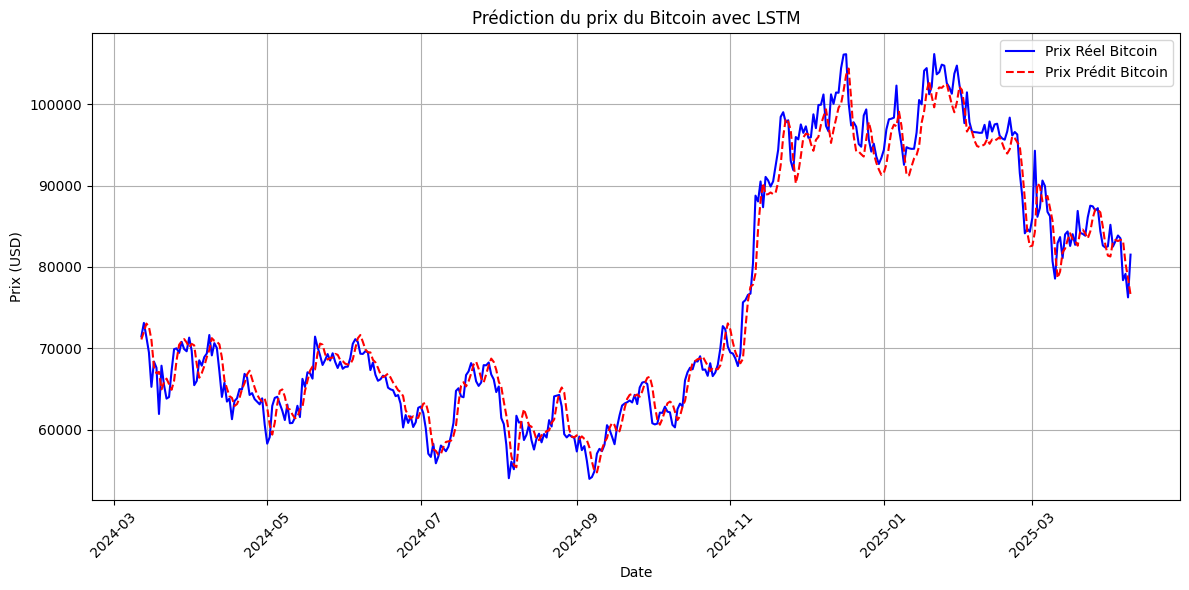

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Fonction pour r√©cup√©rer les donn√©es historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours √† r√©cup√©rer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Param√®tre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la r√©cup√©ration des donn√©es: {response.status_code}")
        return None


# Fonction pour pr√©traiter les donn√©es
def preprocess_data(df):
    # Calculer les rendements quotidiens
    df['return'] = df['close'].pct_change()

    # Supprimer les NaN
    df = df.dropna()

    # Normalisation des donn√©es avec MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df[['close', 'return']])

    return df, df_scaled, scaler


# Fonction pour cr√©er des s√©quences pour l'entra√Ænement du LSTM
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])  # Utiliser uniquement la colonne 'close' pour X
        y.append(data[i + seq_length, 0])  # La cible est la colonne 'close' apr√®s seq_length
    return np.array(X), np.array(y)


# Fonction pour construire le mod√®le LSTM
def build_model(seq_length, input_shape):
    model = Sequential()

    # Premi√®re couche LSTM
    model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Deuxi√®me couche LSTM
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.2))

    # Couche Dense
    model.add(Dense(units=32, activation='relu'))

    # Couche de sortie
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model


# Fonction principale pour entra√Æner le mod√®le
def main():
    # Dates
    today = datetime.today()
    end_timestamp = int(time.mktime(today.timetuple()))
    start_timestamp = 1614556800  # Exemple pour le d√©but de l'ann√©e 2021

    # Collecter les donn√©es de Bitcoin
    bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)

    # V√©rification des donn√©es
    if bitcoin_data is None:
        return

    # Pr√©traitement des donn√©es
    df, df_scaled, scaler = preprocess_data(bitcoin_data)

    # Cr√©ation des s√©quences pour l'entra√Ænement
    seq_length = 30
    X, y = create_sequences(df_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construire le mod√®le LSTM
    model = build_model(seq_length, input_shape=(X_train.shape[1], 1))

    # EarlyStopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entra√Æner le mod√®le
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions
    y_pred = model.predict(X_test)

    # Inverser la normalisation pour obtenir les prix r√©els
    y_test_rescaled = scaler.inverse_transform(np.column_stack((y_test, np.zeros_like(y_test))))[:, 0]
    y_pred_rescaled = scaler.inverse_transform(np.column_stack((y_pred, np.zeros_like(y_pred))))[:, 0]

    # √âvaluation
    mse = np.mean((y_test_rescaled - y_pred_rescaled) ** 2)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Visualisation des r√©sultats
    plt.figure(figsize=(12, 6))
    plt.plot(bitcoin_data['time'].iloc[-len(y_test_rescaled):], y_test_rescaled, label='Prix R√©el Bitcoin', color='blue')
    plt.plot(bitcoin_data['time'].iloc[-len(y_pred_rescaled):], y_pred_rescaled, label='Prix Pr√©dit Bitcoin', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix (USD)')
    plt.title('Pr√©diction du prix du Bitcoin avec LSTM')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Appel √† la fonction principale
main()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 23ms/step - loss: 0.0240 - val_loss: 0.0194
Epoch 2/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 18ms/step - loss: 0.0038 - val_loss: 0.0066
Epoch 3/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 18ms/step - loss: 0.0029 - val_loss: 0.0058
Epoch 4/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 18ms/step - loss: 0.0031 - val_loss: 0.0086
Epoch 5/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 18ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 6/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 19ms/step - loss: 0.0032 - val_loss: 0.0083
Epoch 7/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 19ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 8/20
99/99 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 19ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 9/20


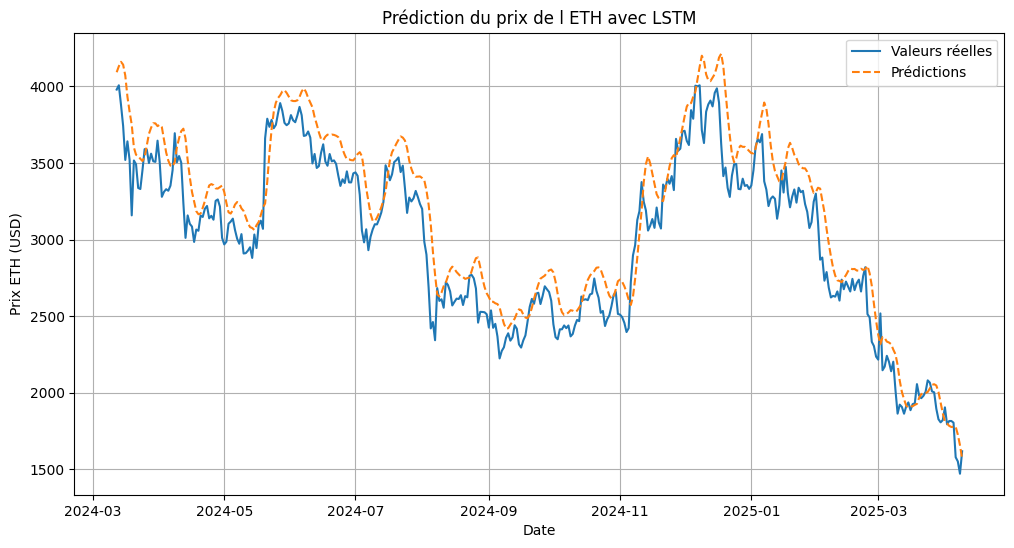

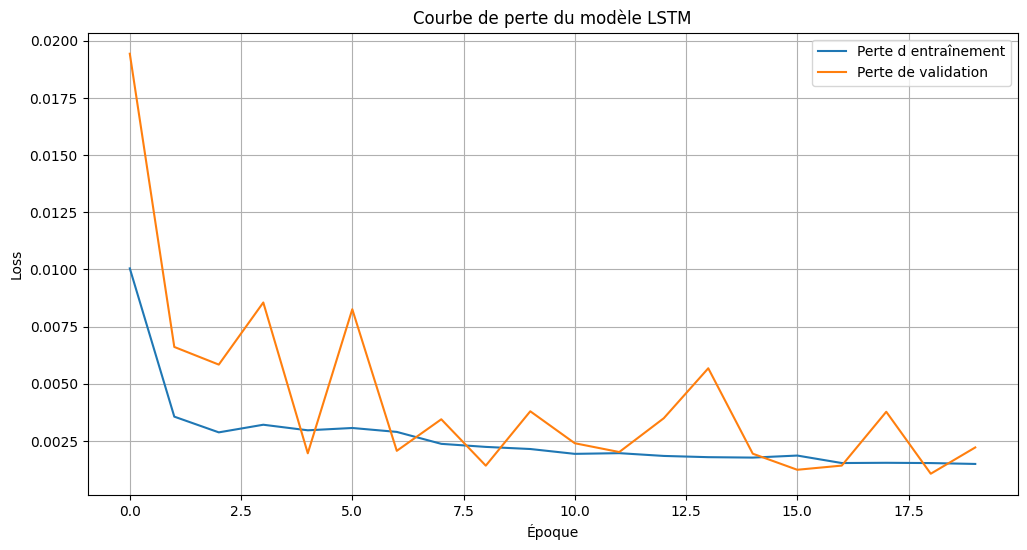

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from datetime import datetime
import time


# D√©finition des timestamps
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # D√©but de l'ann√©e 2021

# Collecte des donn√©es
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 2. Pr√©traitement des donn√©es
def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df.dropna(inplace=True)
    return df

data = preprocess_data(bitcoin_data, ethereum_data)

# 3. Pr√©paration des donn√©es pour le RNN
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['close_btc', 'close_eth']])

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 1])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# 4. Construction du mod√®le LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 2)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5. Entra√Ænement du mod√®le
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# 6. Pr√©dictions et √©valuation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_rescaled = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]


# 7. Visualisation des pr√©dictions
plt.figure(figsize=(12, 6))
plt.plot(data['time'][-len(y_test):], y_test_rescaled, label='Valeurs r√©elles')
plt.plot(data['time'][-len(y_test):], y_pred_rescaled, label='Pr√©dictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Prix ETH (USD)')
plt.title('Pr√©diction du prix de l ETH avec LSTM')
plt.legend()
plt.grid(True)
plt.show()

# 8. Visualisation de la perte
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perte d entra√Ænement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('√âpoque')
plt.ylabel('Loss')
plt.title('Courbe de perte du mod√®le LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# √âvaluation avec plusieurs m√©triques
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Affichage
print("üìä √âvaluation du mod√®le LSTM")
print(f"‚úÖ RMSE : {rmse:.2f}")
print(f"‚úÖ MAE  : {mae:.2f}")
print(f"‚úÖ R¬≤   : {r2:.4f}")


üìä √âvaluation du mod√®le LSTM
‚úÖ RMSE : 221.37
‚úÖ MAE  : 178.37
‚úÖ R¬≤   : 0.8460


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 35ms/step - loss: 0.0175 - mae: 0.0934 - val_loss: 0.0034 - val_mae: 0.0473
Epoch 2/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 0.0076 - mae: 0.0615 - val_loss: 0.0038 - val_mae: 0.0469
Epoch 3/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0066 - mae: 0.0571 - val_loss: 0.0032 - val_mae: 0.0465
Epoch 4/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0067 - mae: 0.0559 - val_loss: 0.0044 - val_mae: 0.0482
Epoch 5/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0060 - mae: 0.0528 - val_loss: 0.0062 - val_mae: 0.0545
Epoch 6/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 0.0055 - mae: 0.0492 - val_loss: 0.0033 - val_mae: 0.0464
Epoch 7/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

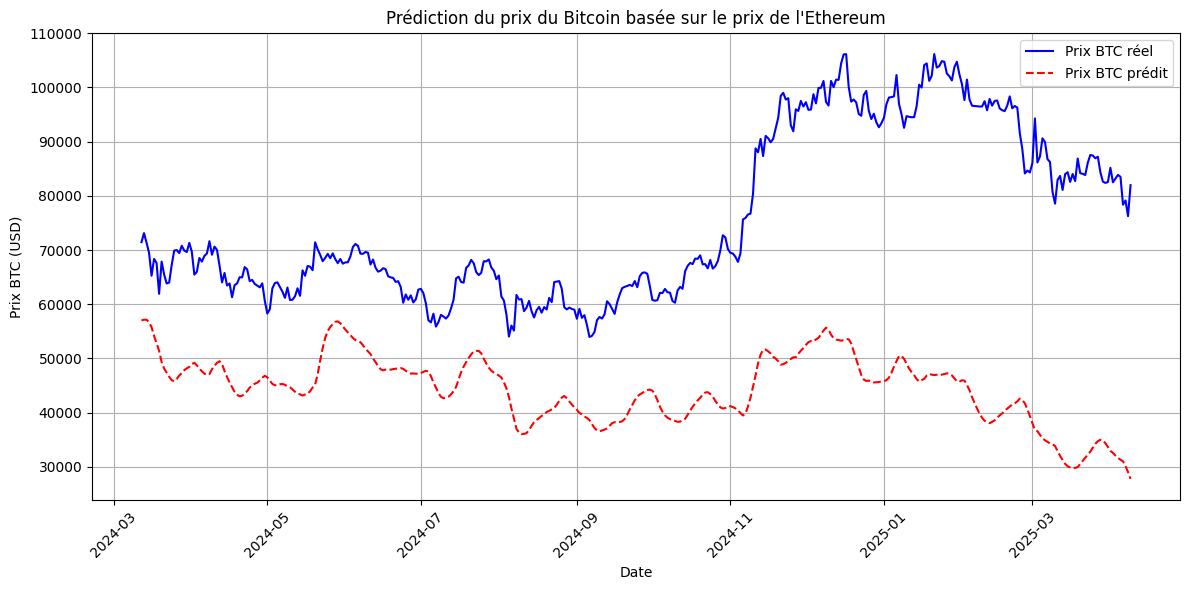

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# R√©cup√©rer les donn√©es historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour pr√©traiter les donn√©es
def preprocess_data(btc_df, eth_df):
    # Fusionner les donn√©es BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si n√©cessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les donn√©es par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour cr√©er des s√©quences pour l'entra√Ænement LSTM
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les s√©quences de prix ETH comme features
        X.append(eth_prices[i:i+seq_length])
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le mod√®le LSTM
def build_model(seq_length, features=1):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # V√©rifier si les donn√©es sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es correctement.")
        return None  # Retourner None si les donn√©es sont invalides

    # Pr√©traitement des donn√©es
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Cr√©ation des scalers pour BTC et ETH s√©par√©ment pour une meilleure mise √† l'√©chelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise √† l'√©chelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Cr√©ation des s√©quences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entra√Ænement du mod√®le
    model = build_model(seq_length)

    # Utilisation d'early stopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix r√©els
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # √âvaluation du mod√®le
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R¬≤: {r2:.4f}")

    # Visualisation des pr√©dictions
    plt.figure(figsize=(12, 6))

    # R√©cup√©rer les dates correspondantes aux donn√©es de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC r√©el', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC pr√©dit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Pr√©diction du prix du Bitcoin bas√©e sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le mod√®le et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les donn√©es r√©cup√©r√©es
if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es.")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 23ms/step - loss: 0.0244 - mae: 0.1148 - val_loss: 0.0039 - val_mae: 0.0519
Epoch 2/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0114 - mae: 0.0770 - val_loss: 0.0063 - val_mae: 0.0597
Epoch 3/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0087 - mae: 0.0647 - val_loss: 0.0038 - val_mae: 0.0439
Epoch 4/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - loss: 0.0084 - mae: 0.0643 - val_loss: 0.0085 - val_mae: 0.0744
Epoch 5/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - loss: 0.0068 - mae: 0.0573 - val_loss: 0.0036 - val_mae: 0.0421
Epoch 6/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0070 - mae: 0.0590 - val_loss: 0.0058 - val_mae: 0.0546
Epoch 7/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

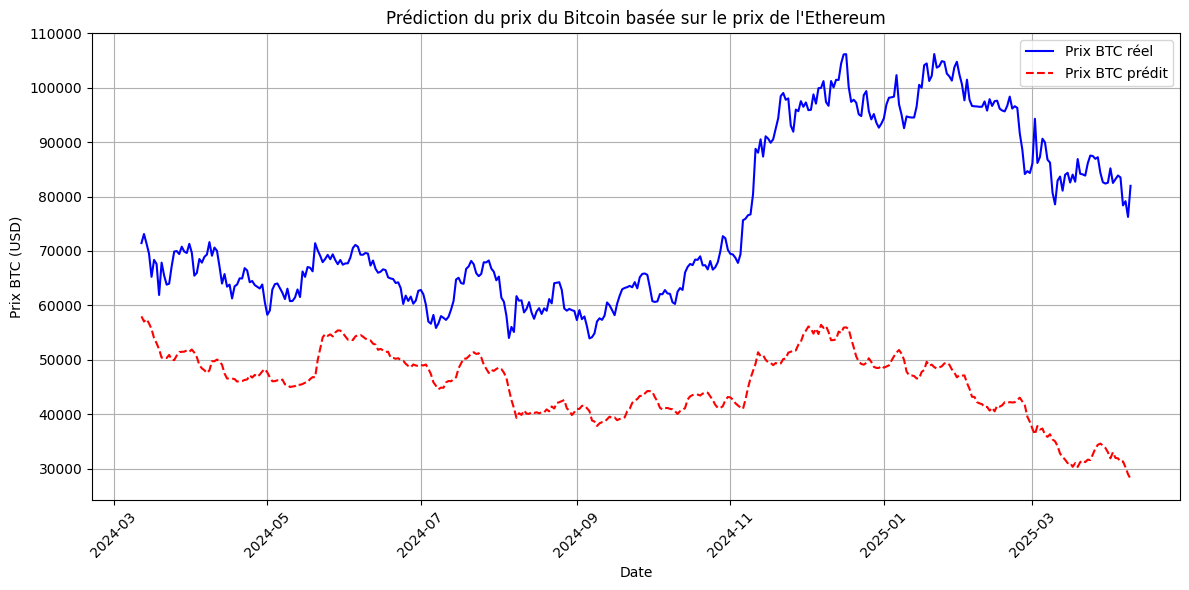

In [ ]:
# Fonction pour construire le mod√®le RNN Simple
def build_rnn_model(seq_length, features=1):
    model = Sequential([
        # Premi√®re couche RNN
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        # Deuxi√®me couche RNN
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        # Couches enti√®rement connect√©es
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main_rnn(bitcoin_data, ethereum_data):
    # V√©rifier si les donn√©es sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es correctement.")
        return None  # Retourner None si les donn√©es sont invalides

    # Pr√©traitement des donn√©es
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Cr√©ation des scalers pour BTC et ETH s√©par√©ment pour une meilleure mise √† l'√©chelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise √† l'√©chelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Cr√©ation des s√©quences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour RNN (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entra√Ænement du mod√®le RNN
    model = build_rnn_model(seq_length)

    # Utilisation d'early stopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix r√©els
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # √âvaluation du mod√®le
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R¬≤: {r2:.4f}")

    # Visualisation des pr√©dictions
    plt.figure(figsize=(12, 6))

    # R√©cup√©rer les dates correspondantes aux donn√©es de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC r√©el', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC pr√©dit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Pr√©diction du prix du Bitcoin bas√©e sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le mod√®le et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les donn√©es r√©cup√©r√©es pour RNN
if btc_data is not None and eth_data is not None:
    model_rnn, eth_scaler_rnn, btc_scaler_rnn = main_rnn(btc_data, eth_data)
else:
    print("Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 45ms/step - loss: 0.0188 - mae: 0.0976 - val_loss: 0.0040 - val_mae: 0.0454
Epoch 2/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 31ms/step - loss: 0.0055 - mae: 0.0488 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 3/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 0.0067 - mae: 0.0536 - val_loss: 0.0073 - val_mae: 0.0621
Epoch 4/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 0.0072 - mae: 0.0576 - val_loss: 0.0037 - val_mae: 0.0469
Epoch 5/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 0.0062 - mae: 0.0527 - val_loss: 0.0030 - val_mae: 0.0458
Epoch 6/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 0.0061 - mae: 0.0527 - val_loss: 0.0044 - val_mae: 0.0473
Epoch 7/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

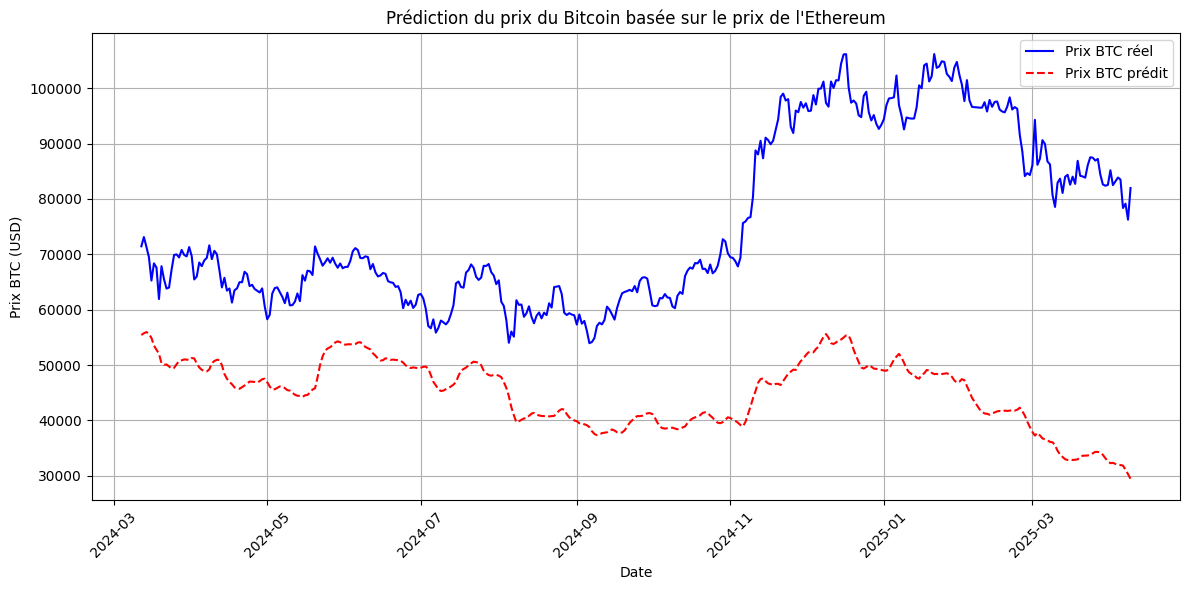

In [ ]:

# Fonction pour construire le mod√®le GRU
def build_gru_model(seq_length, features=1):
    model = Sequential([
        # Premi√®re couche GRU
        GRU(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        # Deuxi√®me couche GRU
        GRU(64, return_sequences=False),
        Dropout(0.2),
        # Couches enti√®rement connect√©es
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main_gru(bitcoin_data, ethereum_data):
    # V√©rifier si les donn√©es sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es correctement.")
        return None  # Retourner None si les donn√©es sont invalides

    # Pr√©traitement des donn√©es
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Cr√©ation des scalers pour BTC et ETH s√©par√©ment pour une meilleure mise √† l'√©chelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise √† l'√©chelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Cr√©ation des s√©quences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour GRU (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entra√Ænement du mod√®le GRU
    model = build_gru_model(seq_length)

    # Utilisation d'early stopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix r√©els
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # √âvaluation du mod√®le
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R¬≤: {r2:.4f}")

    # Visualisation des pr√©dictions
    plt.figure(figsize=(12, 6))

    # R√©cup√©rer les dates correspondantes aux donn√©es de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC r√©el', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC pr√©dit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Pr√©diction du prix du Bitcoin bas√©e sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le mod√®le et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les donn√©es r√©cup√©r√©es pour GRU
if btc_data is not None and eth_data is not None:
    model_gru, eth_scaler_gru, btc_scaler_gru = main_gru(btc_data, eth_data)
else:
    print("Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 49ms/step - loss: 0.0256 - mae: 0.1067 - val_loss: 6.6817e-04 - val_mae: 0.0199
Epoch 2/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - loss: 0.0022 - mae: 0.0322 - val_loss: 7.9223e-04 - val_mae: 0.0178
Epoch 3/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 27ms/step - loss: 0.0016 - mae: 0.0264 - val_loss: 0.0014 - val_mae: 0.0269
Epoch 4/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 27ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 0.0011 - val_mae: 0.0219
Epoch 5/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0013 - mae: 0.0233 - val_loss: 7.9630e-04 - val_mae: 0.0176
Epoch 6/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0012 - mae: 0.0236 - val_loss: 6.1990e-04 - val_mae: 0.0151
Epoch 7/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

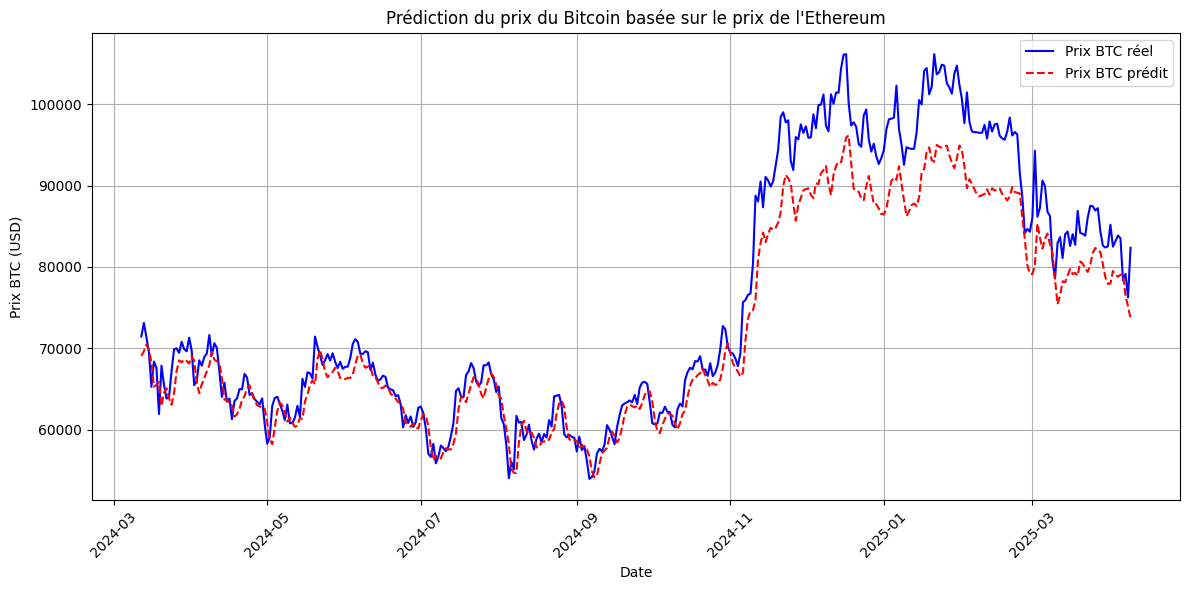

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour r√©cup√©rer les donn√©es historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours √† r√©cup√©rer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Param√®tre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la r√©cup√©ration des donn√©es: {response.status_code}")
        return None

# Fonction pour pr√©traiter les donn√©es
def preprocess_data(btc_df, eth_df):
    # Fusionner les donn√©es BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si n√©cessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les donn√©es par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour cr√©er des s√©quences pour l'entra√Ænement LSTM
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les s√©quences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le mod√®le LSTM
def build_model(seq_length, features=2):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # V√©rifier si les donn√©es sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es correctement.")
        return None  # Retourner None si les donn√©es sont invalides

    # Pr√©traitement des donn√©es
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Cr√©ation des scalers pour BTC et ETH s√©par√©ment pour une meilleure mise √† l'√©chelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise √† l'√©chelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Cr√©ation des s√©quences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque s√©quence a 2 caract√©ristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entra√Ænement du mod√®le
    model = build_model(seq_length)

    # Utilisation d'early stopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix r√©els
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # √âvaluation du mod√®le
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R¬≤: {r2:.4f}")

    # Visualisation des pr√©dictions
    plt.figure(figsize=(12, 6))

    # R√©cup√©rer les dates correspondantes aux donn√©es de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC r√©el', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC pr√©dit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Pr√©diction du prix du Bitcoin bas√©e sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le mod√®le et les scalers
    return model, eth_scaler, btc_scaler

# R√©cup√©rer les donn√©es historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : d√©but de l'ann√©e 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les donn√©es r√©cup√©r√©es
if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 42ms/step - loss: 0.0192 - mae: 0.0936 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 2/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 27ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 4.0720e-04 - val_mae: 0.0151
Epoch 3/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 8.5959e-04 - mae: 0.0198 - val_loss: 0.0010 - val_mae: 0.0283
Epoch 4/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 8.3728e-04 - mae: 0.0203 - val_loss: 2.0861e-04 - val_mae: 0.0103
Epoch 5/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 9.4886e-04 - mae: 0.0207 - val_loss: 4.7829e-04 - val_mae: 0.0161
Epoch 6/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 27ms/step - loss: 8.4322e-04 - mae: 0.0191 - val_loss: 0.0019 - val_mae: 0.0399
Epoch 7/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

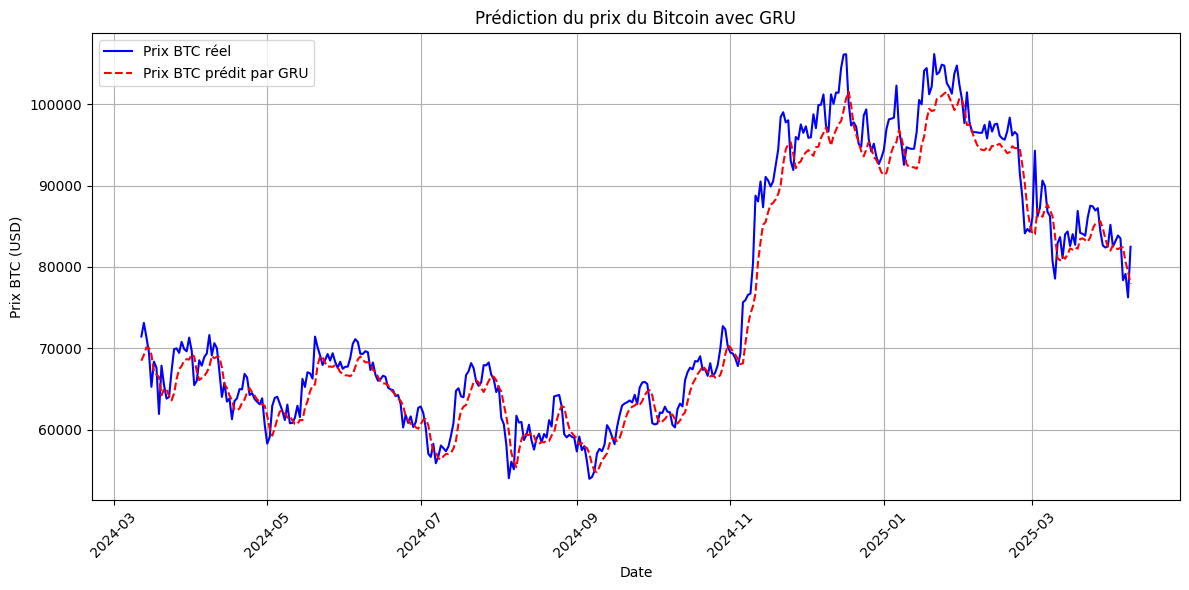

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour r√©cup√©rer les donn√©es historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours √† r√©cup√©rer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Param√®tre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la r√©cup√©ration des donn√©es: {response.status_code}")
        return None

# Fonction pour pr√©traiter les donn√©es
def preprocess_data(btc_df, eth_df):
    # Fusionner les donn√©es BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si n√©cessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les donn√©es par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour cr√©er des s√©quences pour l'entra√Ænement GRU
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les s√©quences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le mod√®le GRU
def build_gru_model(seq_length, features=2):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # V√©rifier si les donn√©es sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es correctement.")
        return None  # Retourner None si les donn√©es sont invalides

    # Pr√©traitement des donn√©es
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Cr√©ation des scalers pour BTC et ETH s√©par√©ment pour une meilleure mise √† l'√©chelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise √† l'√©chelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Cr√©ation des s√©quences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour GRU (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque s√©quence a 2 caract√©ristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entra√Ænement du mod√®le GRU
    gru_model = build_gru_model(seq_length)

    # Utilisation d'early stopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    gru_history = gru_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions avec le mod√®le GRU
    gru_pred = gru_model.predict(X_test)

    # Inversions pour obtenir les prix r√©els
    y_test_btc = btc_scaler.inverse_transform(y_test)
    gru_pred_btc = btc_scaler.inverse_transform(gru_pred)

    # √âvaluation du mod√®le GRU
    gru_mse = mean_squared_error(y_test_btc, gru_pred_btc)
    gru_rmse = np.sqrt(gru_mse)
    gru_r2 = r2_score(y_test_btc, gru_pred_btc)

    print(f"GRU - MSE: {gru_mse:.2f}")
    print(f"GRU - RMSE: {gru_rmse:.2f}")
    print(f"GRU - R¬≤: {gru_r2:.4f}")

    # Visualisation des pr√©dictions
    plt.figure(figsize=(12, 6))

    # R√©cup√©rer les dates correspondantes aux donn√©es de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC r√©el', color='blue')
    plt.plot(test_dates, gru_pred_btc, label='Prix BTC pr√©dit par GRU', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Pr√©diction du prix du Bitcoin avec GRU')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le mod√®le et les scalers
    return gru_model, eth_scaler, btc_scaler

# R√©cup√©rer les donn√©es historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : d√©but de l'ann√©e 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les donn√©es r√©cup√©r√©es
if btc_data is not None and eth_data is not None:
    gru_model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 22ms/step - loss: 0.0430 - mae: 0.1469 - val_loss: 0.0076 - val_mae: 0.0697
Epoch 2/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0065 - mae: 0.0600 - val_loss: 0.0060 - val_mae: 0.0659
Epoch 3/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0056 - mae: 0.0529 - val_loss: 0.0049 - val_mae: 0.0550
Epoch 4/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0036 - mae: 0.0421 - val_loss: 0.0028 - val_mae: 0.0441
Epoch 5/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - loss: 0.0030 - mae: 0.0391 - val_loss: 0.0016 - val_mae: 0.0268
Epoch 6/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - loss: 0.0026 - mae: 0.0349 - val_loss: 0.0018 - val_mae: 0.0311
Epoch 7/100
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

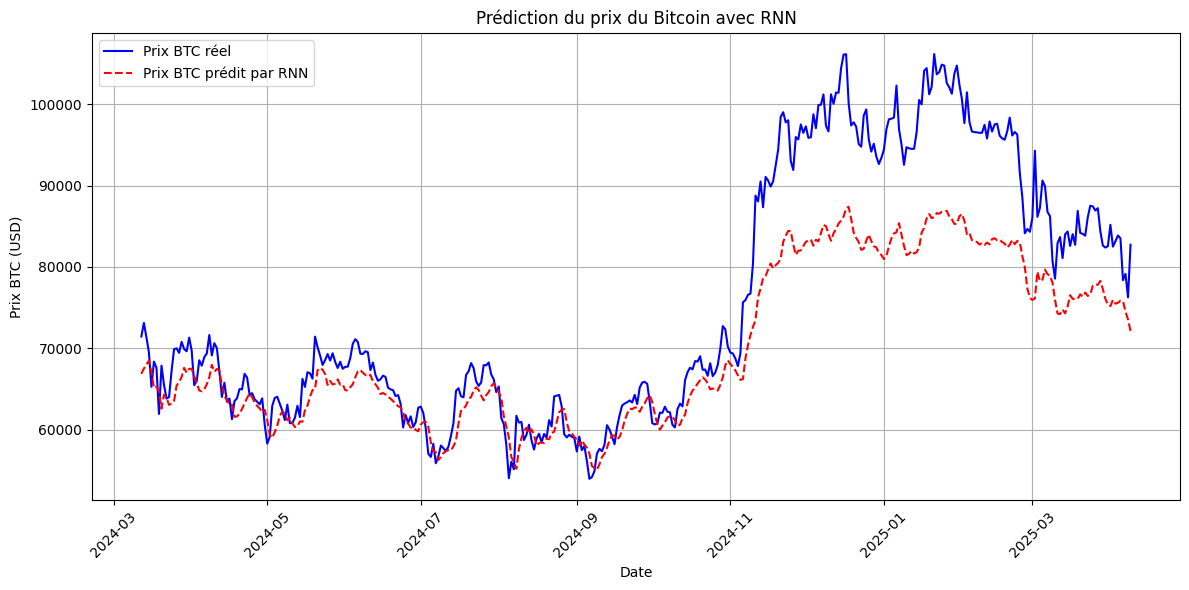

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour r√©cup√©rer les donn√©es historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours √† r√©cup√©rer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Param√®tre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la r√©cup√©ration des donn√©es: {response.status_code}")
        return None

# Fonction pour pr√©traiter les donn√©es
def preprocess_data(btc_df, eth_df):
    # Fusionner les donn√©es BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si n√©cessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les donn√©es par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour cr√©er des s√©quences pour l'entra√Ænement RNN
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les s√©quences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le mod√®le RNN
def build_rnn_model(seq_length, features=2):
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # V√©rifier si les donn√©es sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es correctement.")
        return None  # Retourner None si les donn√©es sont invalides

    # Pr√©traitement des donn√©es
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Cr√©ation des scalers pour BTC et ETH s√©par√©ment pour une meilleure mise √† l'√©chelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise √† l'√©chelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Cr√©ation des s√©quences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour RNN (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque s√©quence a 2 caract√©ristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entra√Ænement du mod√®le RNN
    rnn_model = build_rnn_model(seq_length)

    # Utilisation d'early stopping pour √©viter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    rnn_history = rnn_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Pr√©dictions avec le mod√®le RNN
    rnn_pred = rnn_model.predict(X_test)

    # Inversions pour obtenir les prix r√©els
    y_test_btc = btc_scaler.inverse_transform(y_test)
    rnn_pred_btc = btc_scaler.inverse_transform(rnn_pred)

    # √âvaluation du mod√®le RNN
    rnn_mse = mean_squared_error(y_test_btc, rnn_pred_btc)
    rnn_rmse = np.sqrt(rnn_mse)
    rnn_r2 = r2_score(y_test_btc, rnn_pred_btc)

    print(f"RNN - MSE: {rnn_mse:.2f}")
    print(f"RNN - RMSE: {rnn_rmse:.2f}")
    print(f"RNN - R¬≤: {rnn_r2:.4f}")

    # Visualisation des pr√©dictions
    plt.figure(figsize=(12, 6))

    # R√©cup√©rer les dates correspondantes aux donn√©es de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC r√©el', color='blue')
    plt.plot(test_dates, rnn_pred_btc, label='Prix BTC pr√©dit par RNN', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Pr√©diction du prix du Bitcoin avec RNN')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le mod√®le et les scalers
    return rnn_model, eth_scaler, btc_scaler

# R√©cup√©rer les donn√©es historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : d√©but de l'ann√©e 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les donn√©es r√©cup√©r√©es
if btc_data is not None and eth_data is not None:
    rnn_model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les donn√©es n'ont pas pu √™tre r√©cup√©r√©es.")
